In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.ticker as ticker
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap

In [11]:
df = pd.read_csv("B2B_updated_final1.csv")

In [12]:
#Seperating home team, winner and b2b status
df_home = df[['homename', 'homescore', 'awayscore', 'home_back_to_back', 'season']].copy()
df_home['Team'] = df_home['homename']
df_home['Game Status'] = df_home.apply(lambda row: 'Win' if row['homescore'] > row['awayscore']
                                       else 'Loss', 
                                       axis=1)
 # filter out only home b2b games
df_home = df_home[df_home['home_back_to_back'] == 1] 
df_home = df_home[['Team', 'Game Status', 'season']]

In [13]:
#Seperating home team, winner and b2b status
df_away = df[['awayname', 'awayscore', 'homescore', 'away_back_to_back', 'season']].copy()
df_away['Team'] = df_away['awayname']
df_away['Game Status'] = df_away.apply(lambda row: 'Win' if row['awayscore'] > row['homescore']
                                       else 'Loss', 
                                       axis=1)
 #Filter out only away b2b games
df_away = df_away[df_away['away_back_to_back'] == 1]
df_away = df_away[['Team', 'Game Status', 'season']]

In [14]:
#Concatenate data 
df_new = pd.concat([df_home, df_away])

In [15]:
# Calculate total games and win %
results = df_new.groupby(['Team', 'Game Status']).size().unstack(fill_value=0)

results['Total Games'] = results['Win'] + results['Loss']
results['Win %'] = results['Win'] / results['Total Games'] * 100

results.columns = ['Losses', 'Wins', 'Total Games', 'Win %']
print(results['Total Games'].max())
print(results['Win %'].min())
print(results['Win %'].max())
print(results)

330
35.23809523809524
55.158730158730165
                       Losses  Wins  Total Games      Win %
Team                                                       
Anaheim Ducks             162   119          281  42.348754
Arizona Coyotes            68    37          105  35.238095
Atlanta Thrashers          94    56          150  37.333333
Boston Bruins             136   136          272  50.000000
Buffalo Sabres            210   120          330  36.363636
Calgary Flames            142   108          250  43.200000
Carolina Hurricanes       159   145          304  47.697368
Chicago Blackhawks        165   138          303  45.544554
Colorado Avalanche        115    94          209  44.976077
Columbus Blue Jackets     194   118          312  37.820513
Dallas Stars              139   102          241  42.323651
Detroit Red Wings         160   153          313  48.881789
Edmonton Oilers           136    94          230  40.869565
Florida Panthers          165   102          267  38.202247

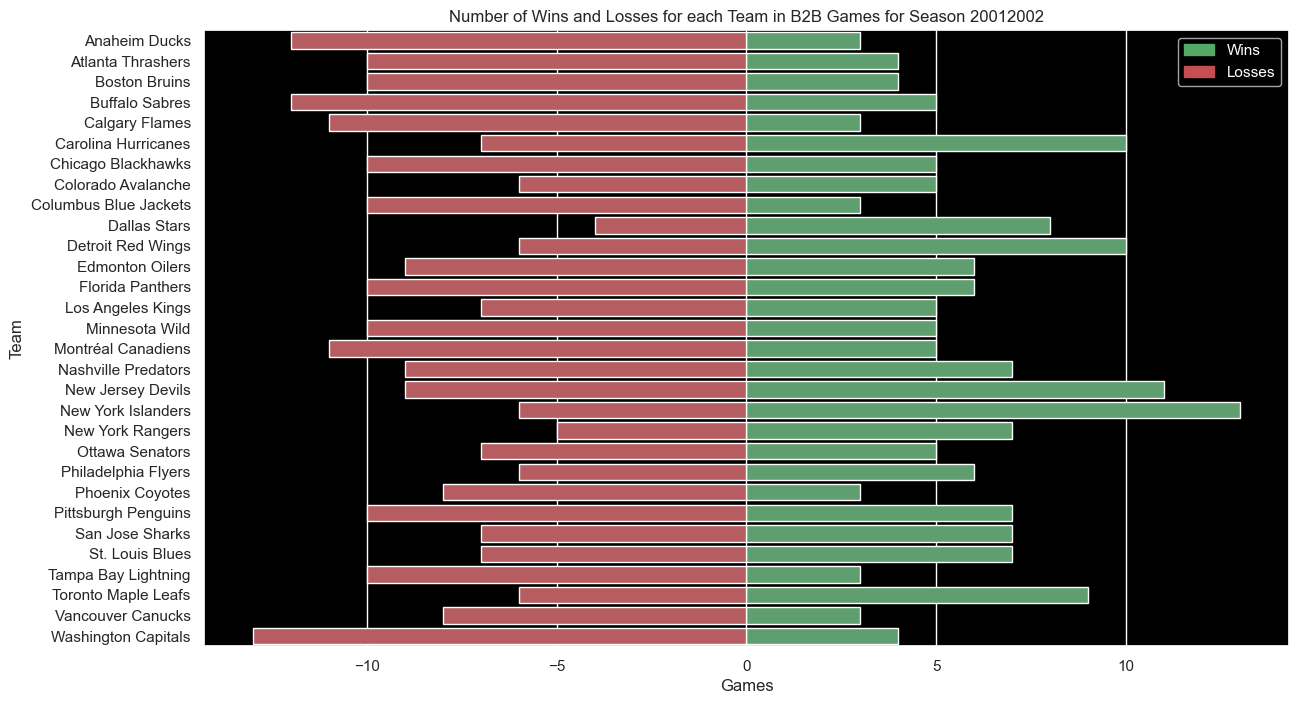

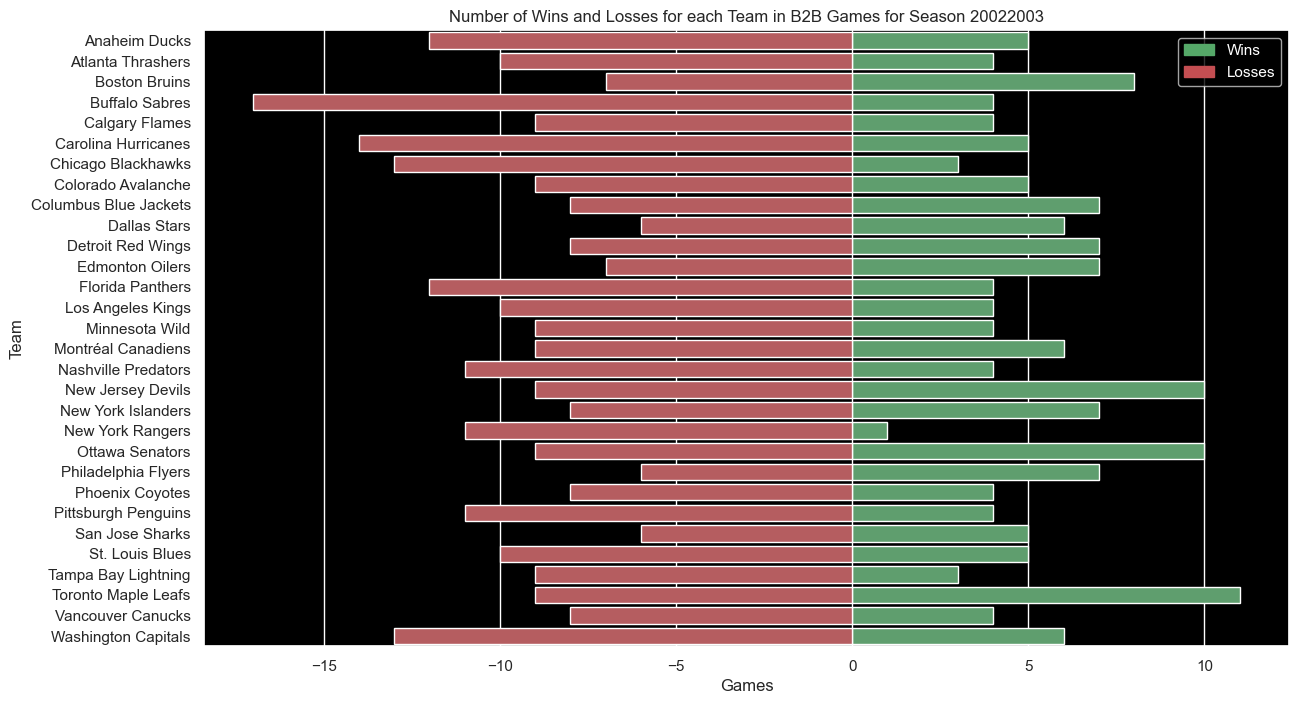

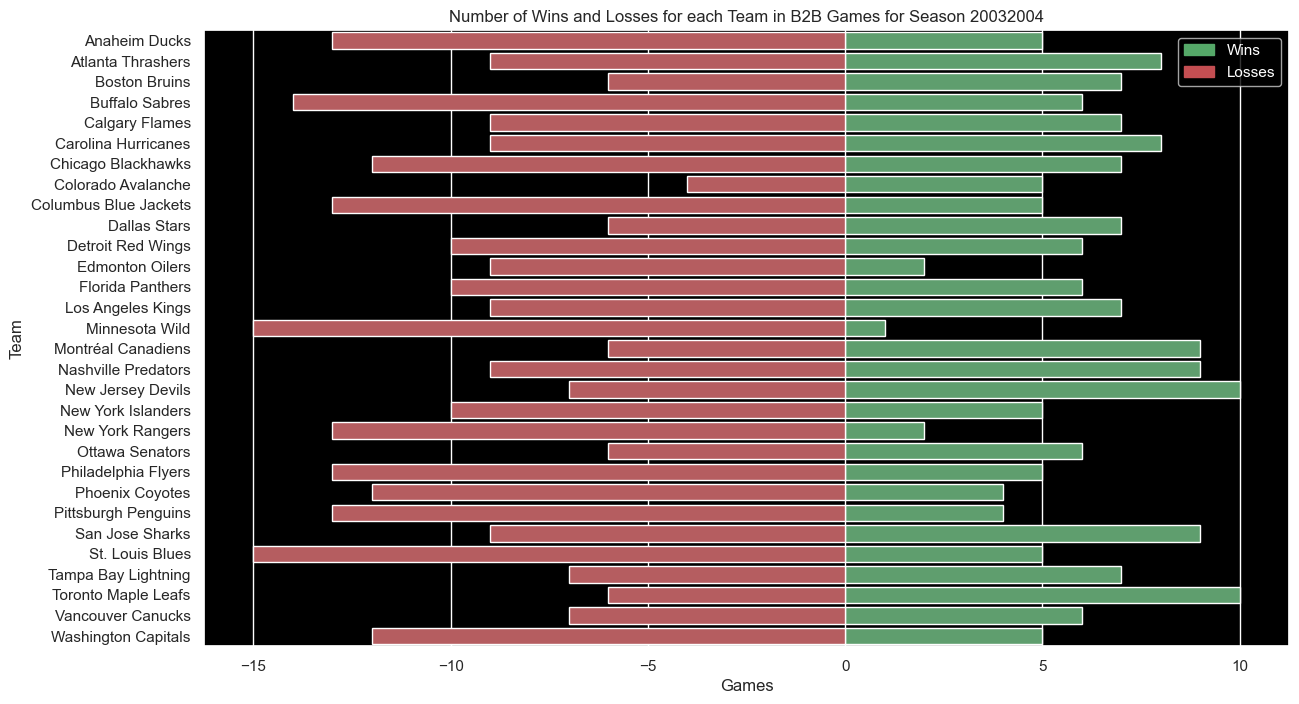

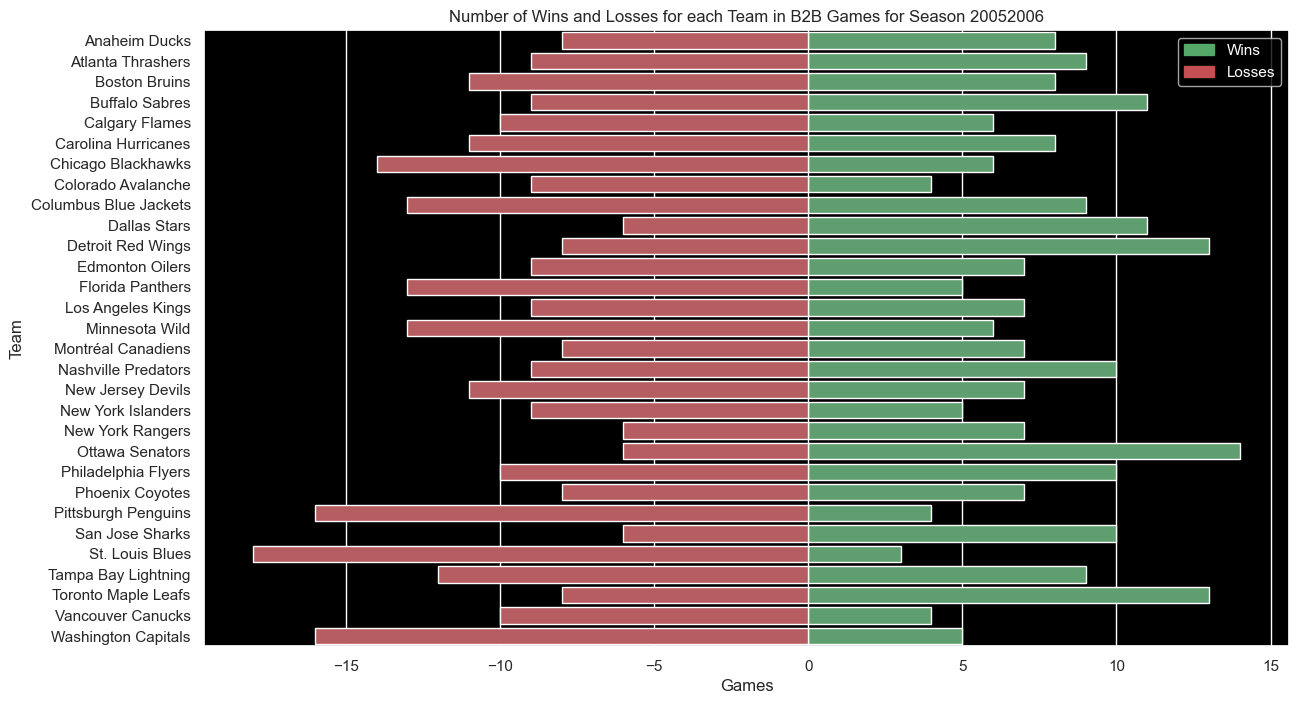

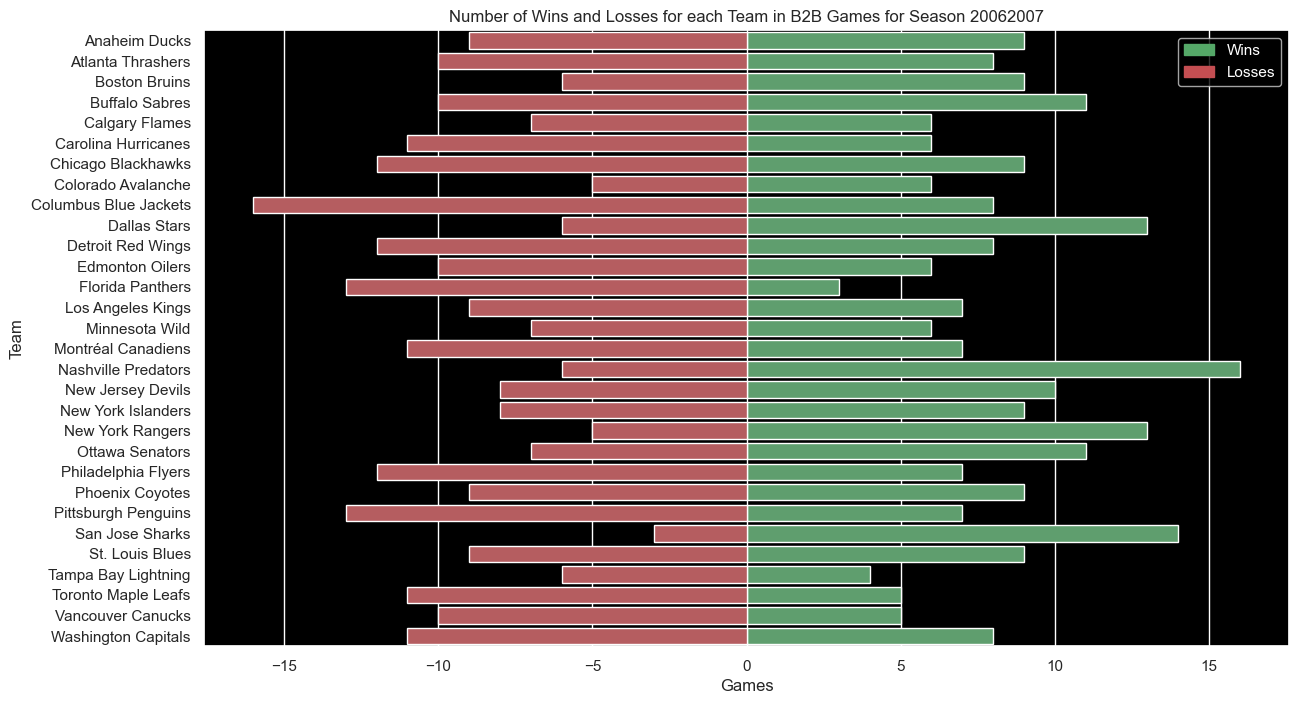

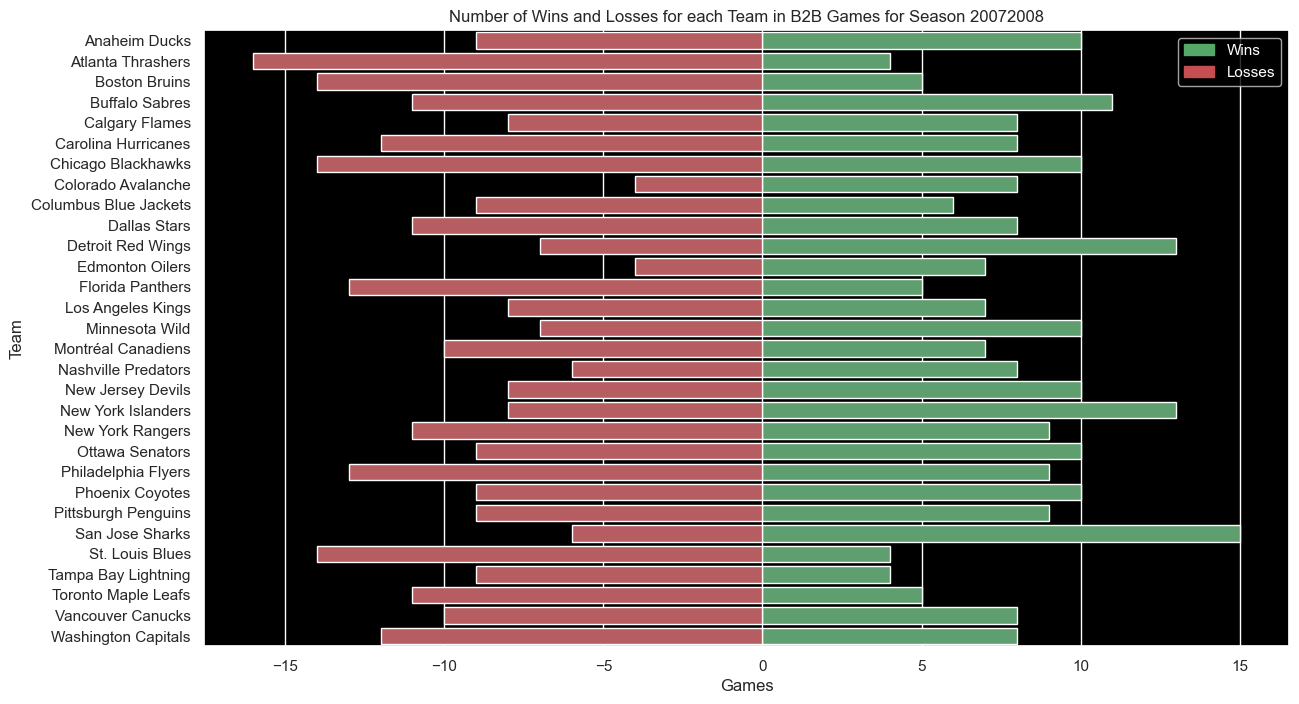

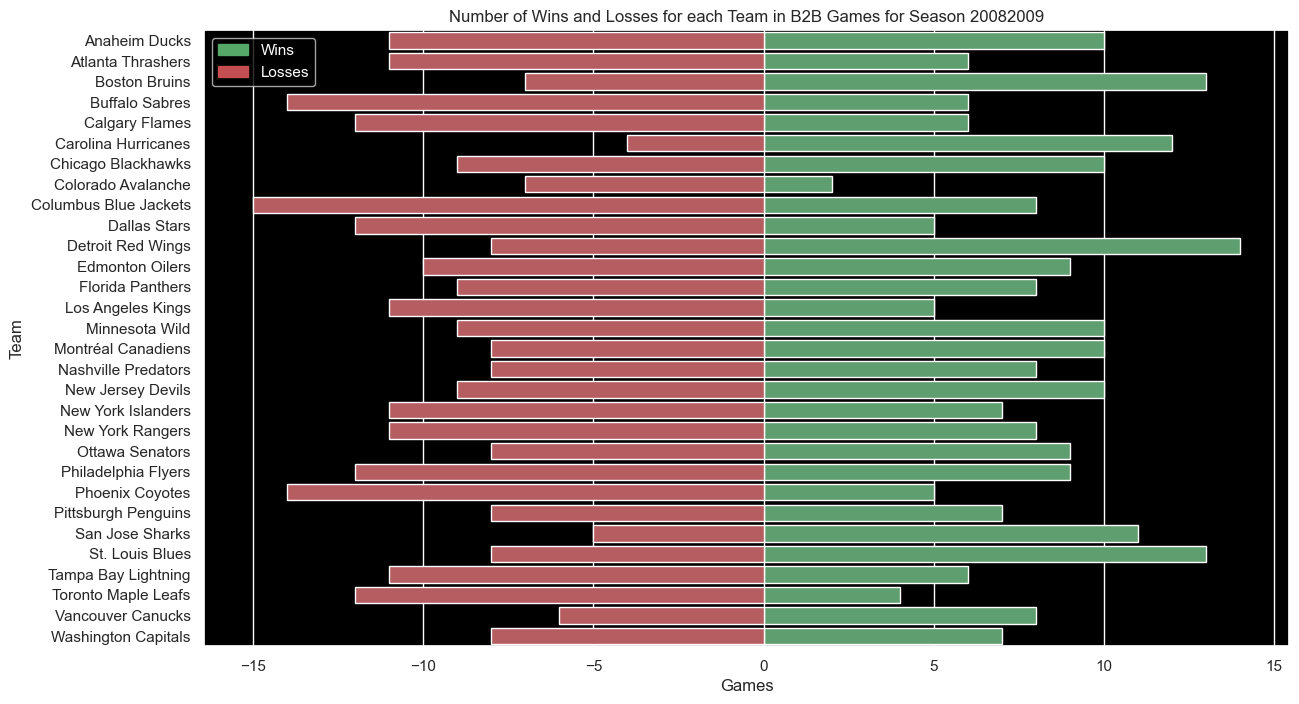

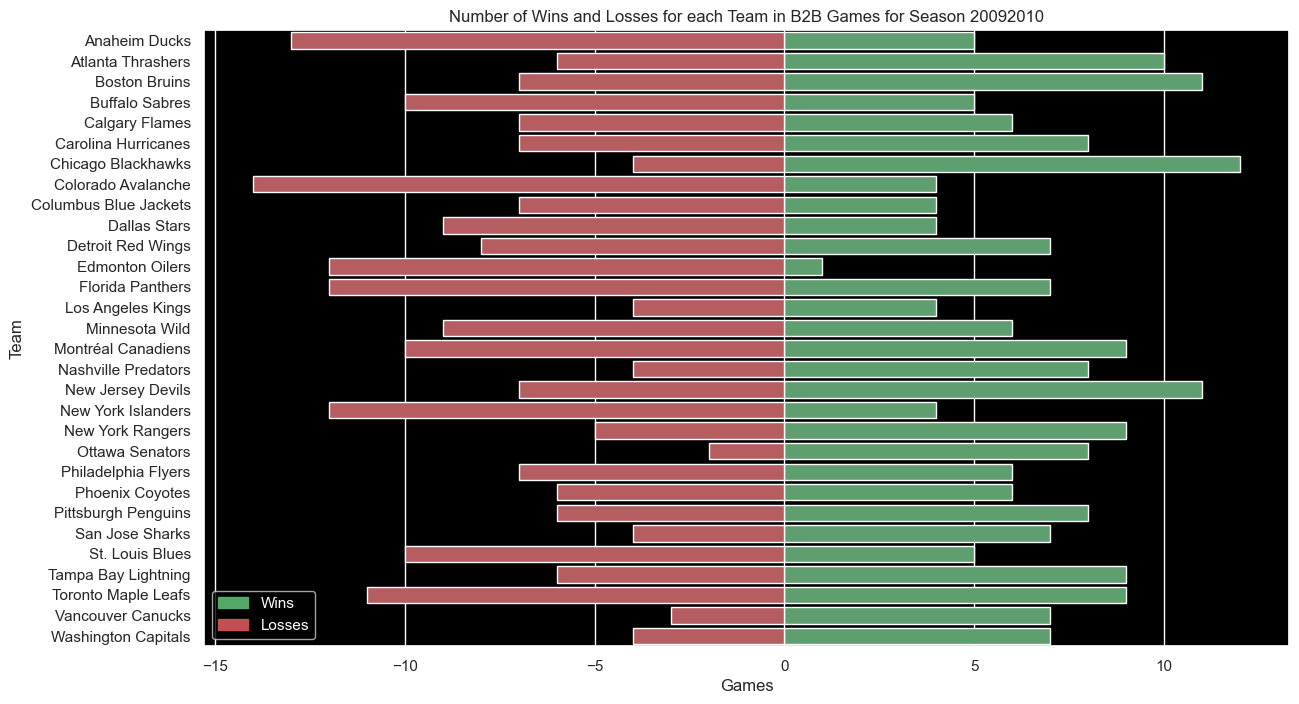

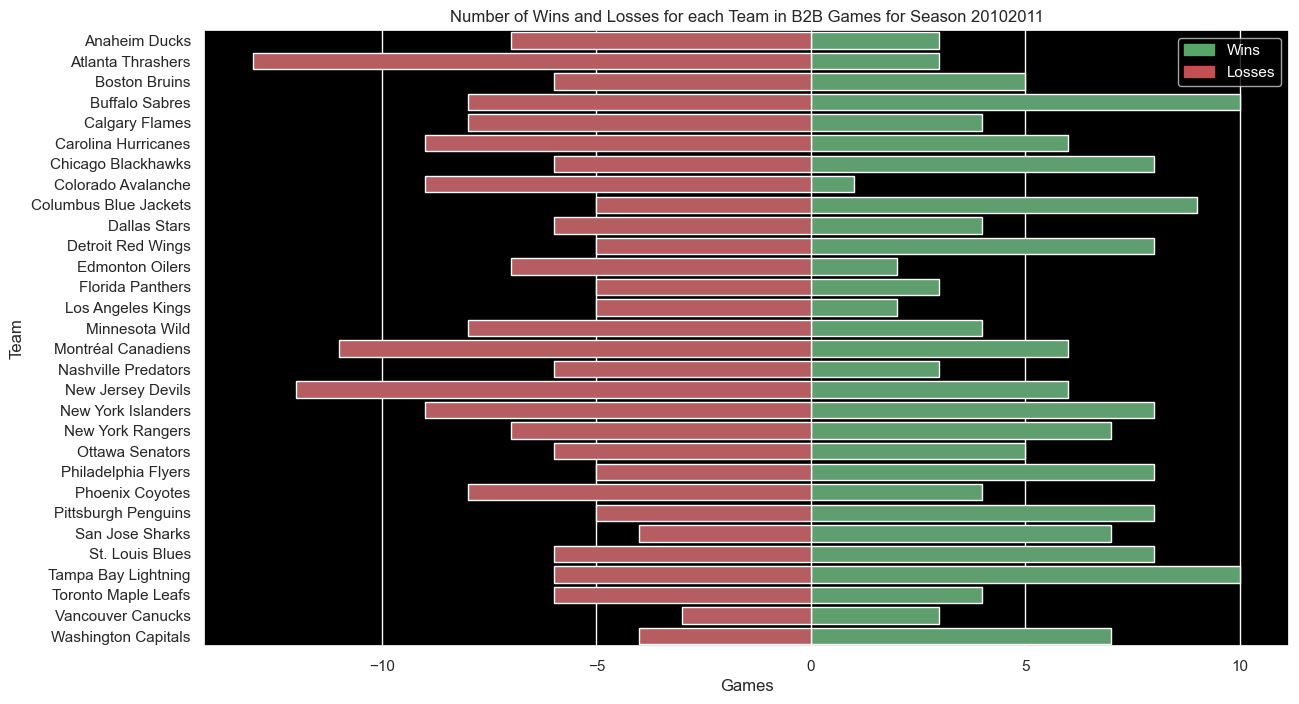

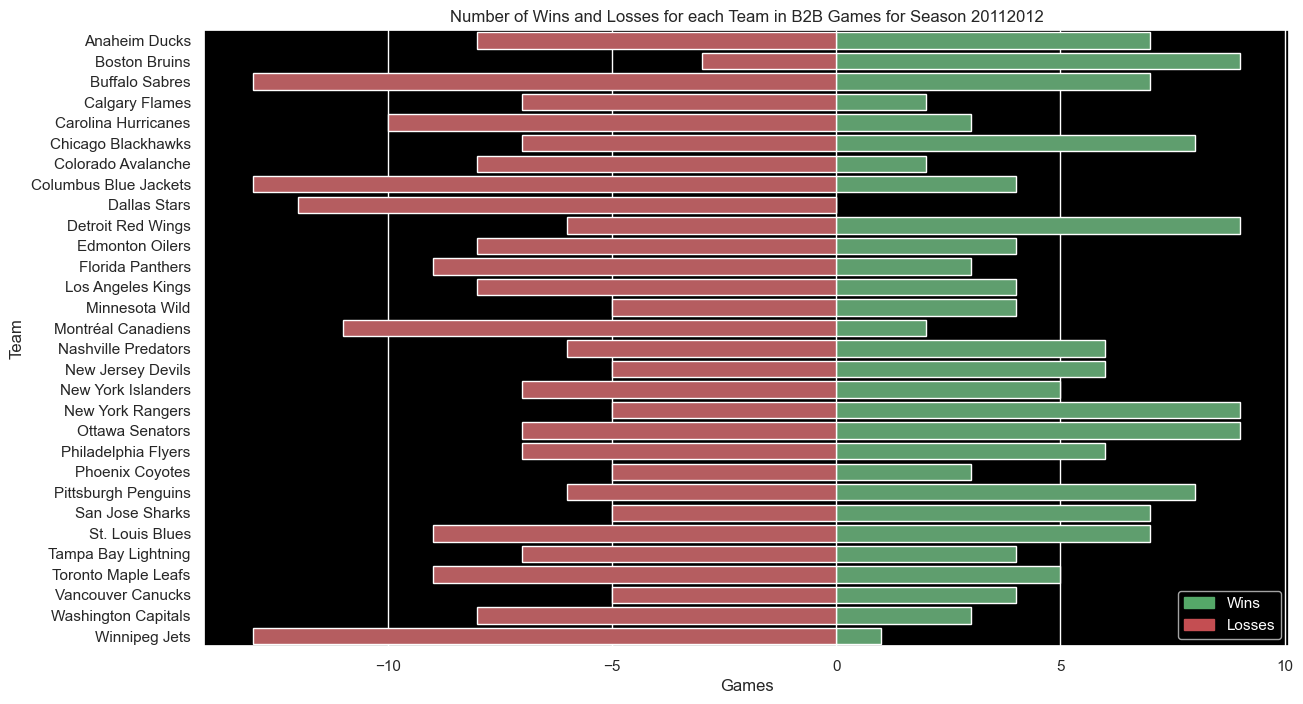

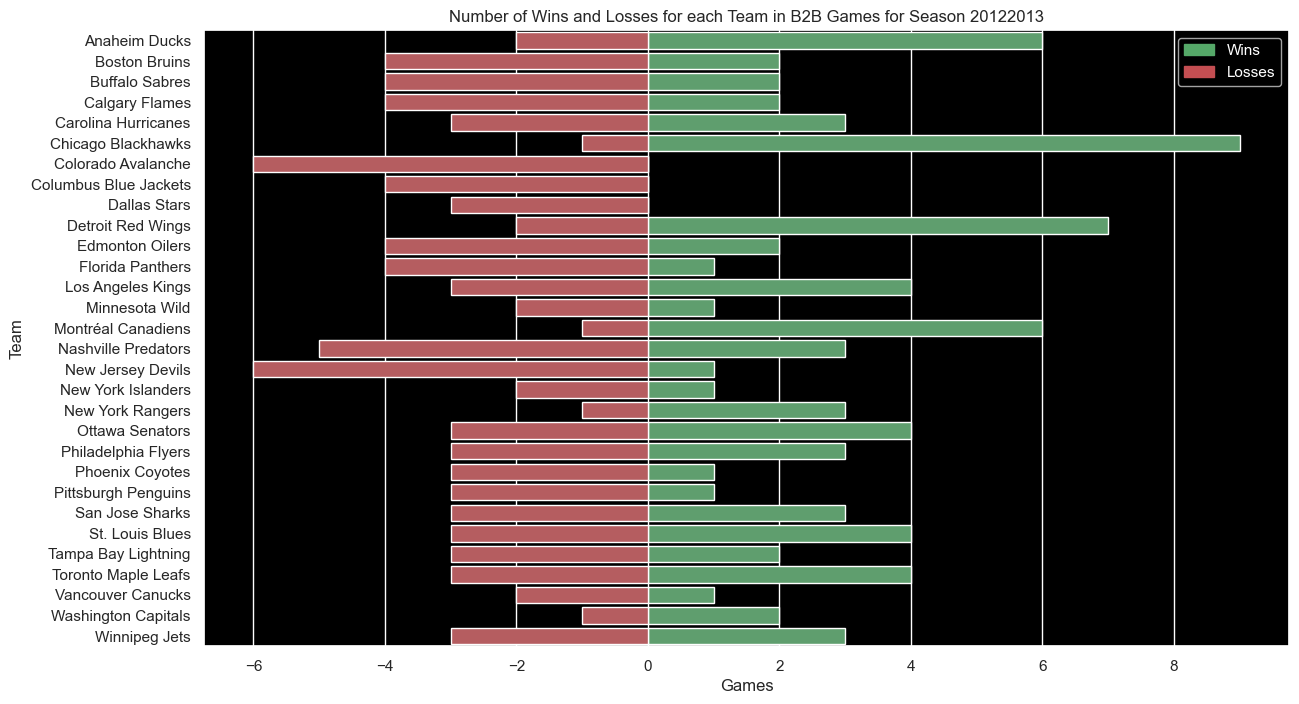

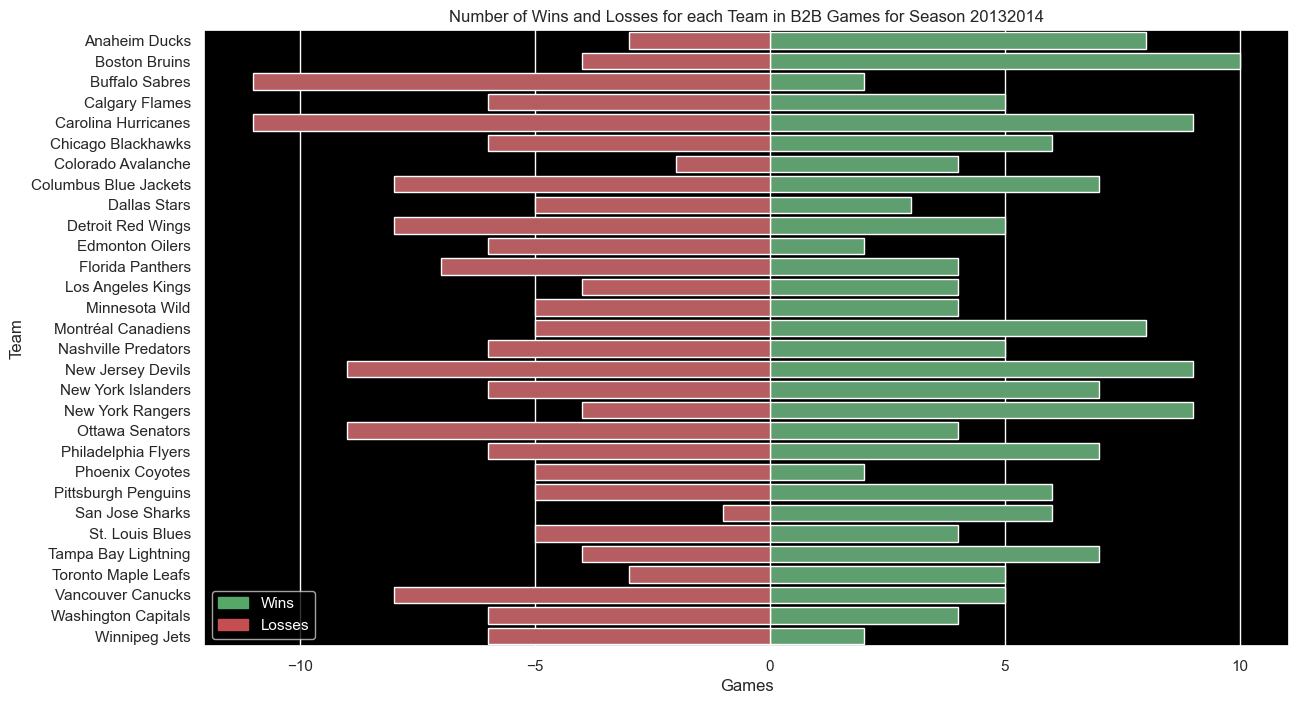

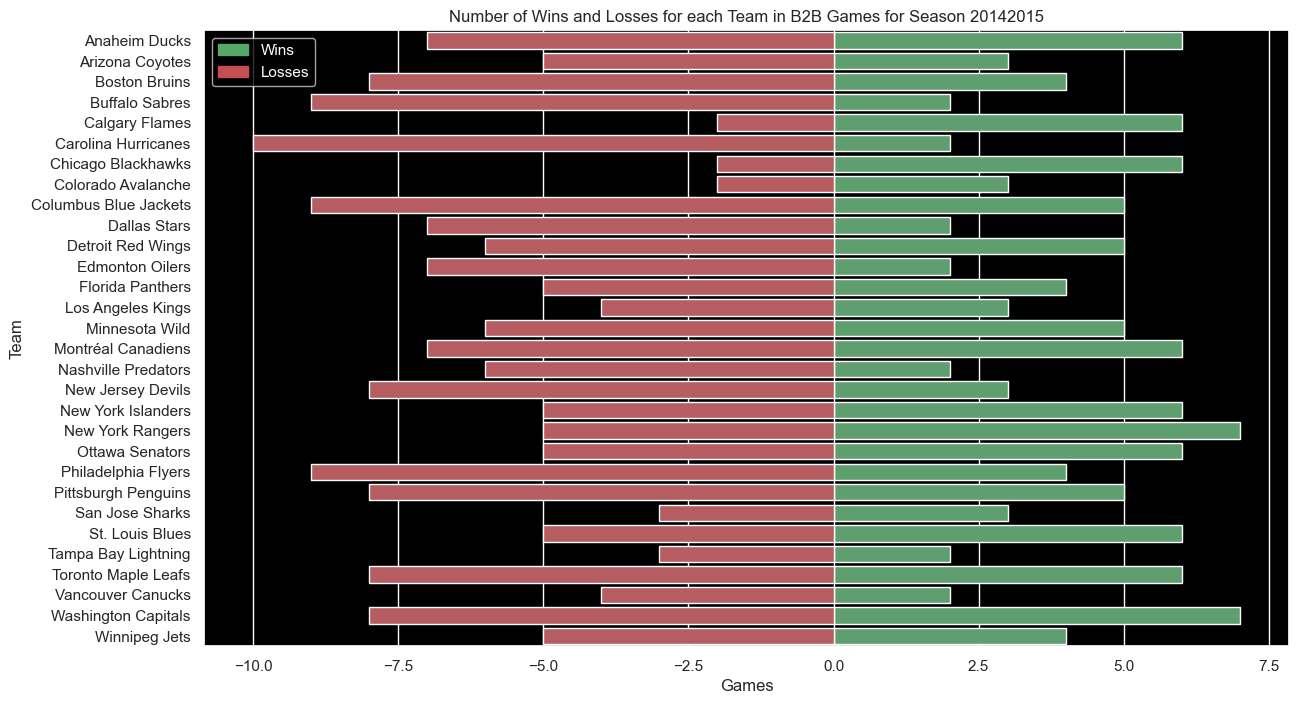

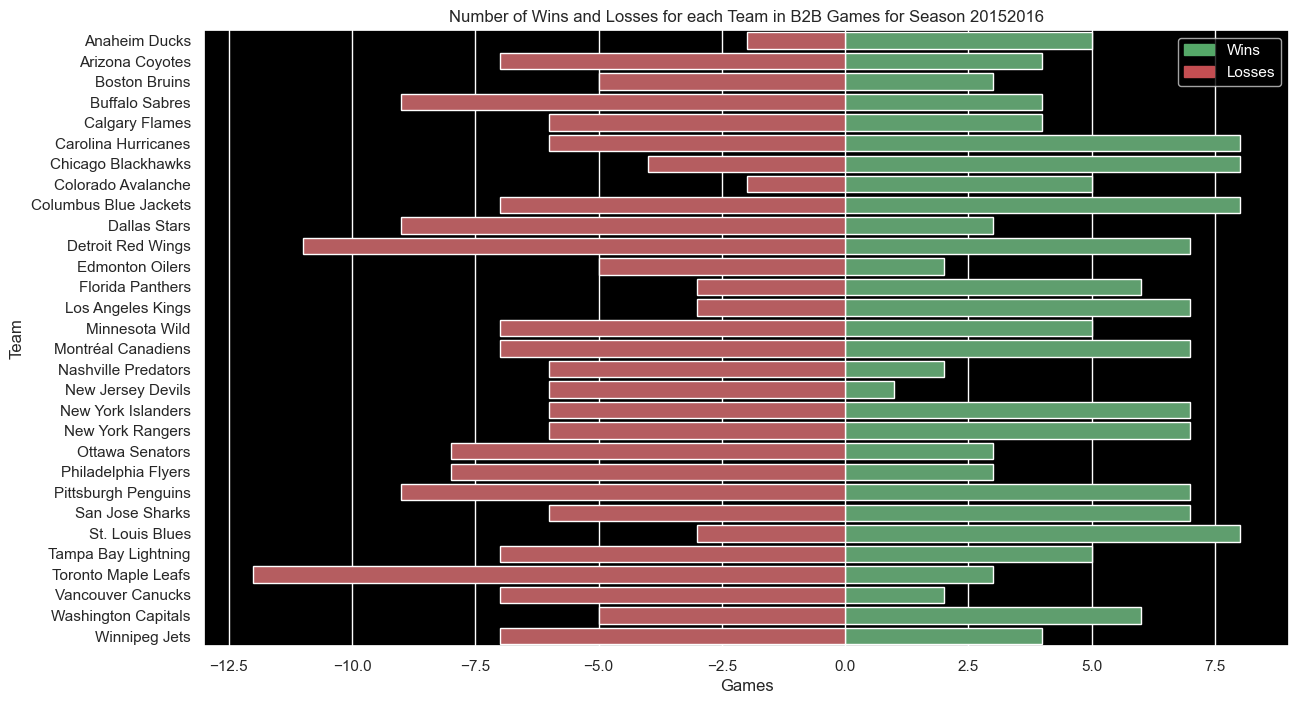

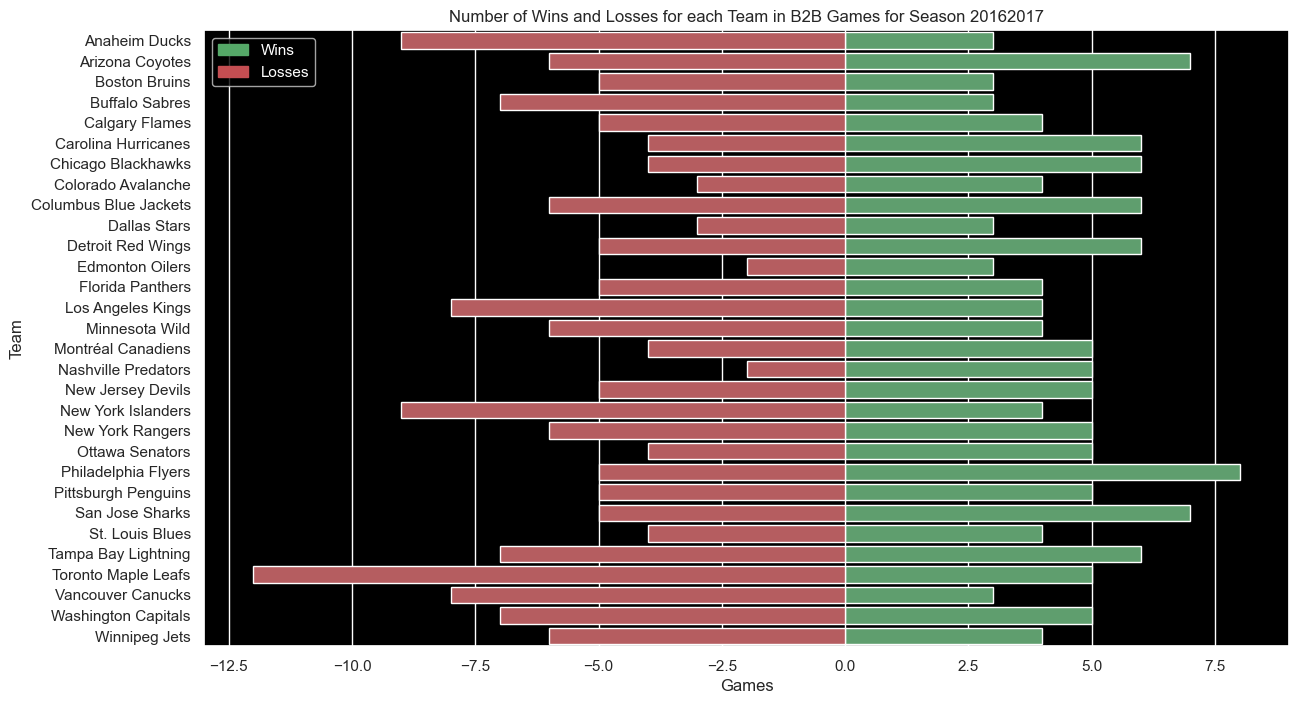

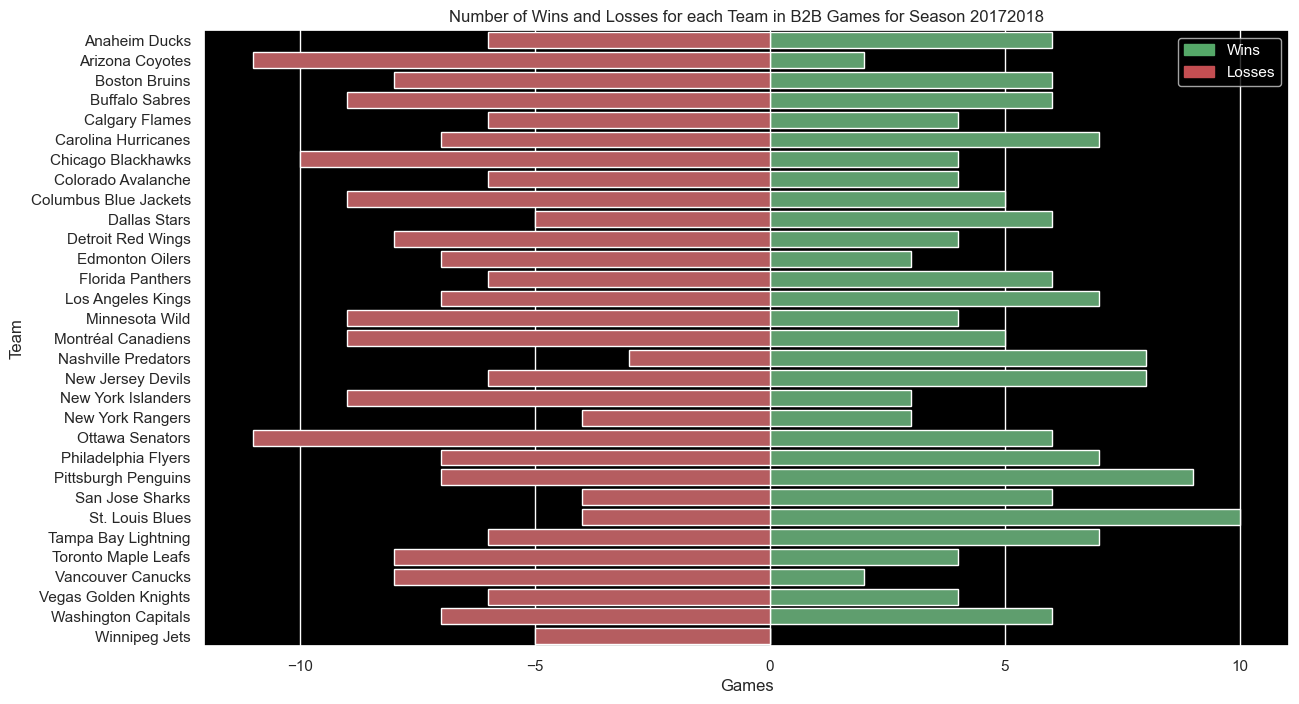

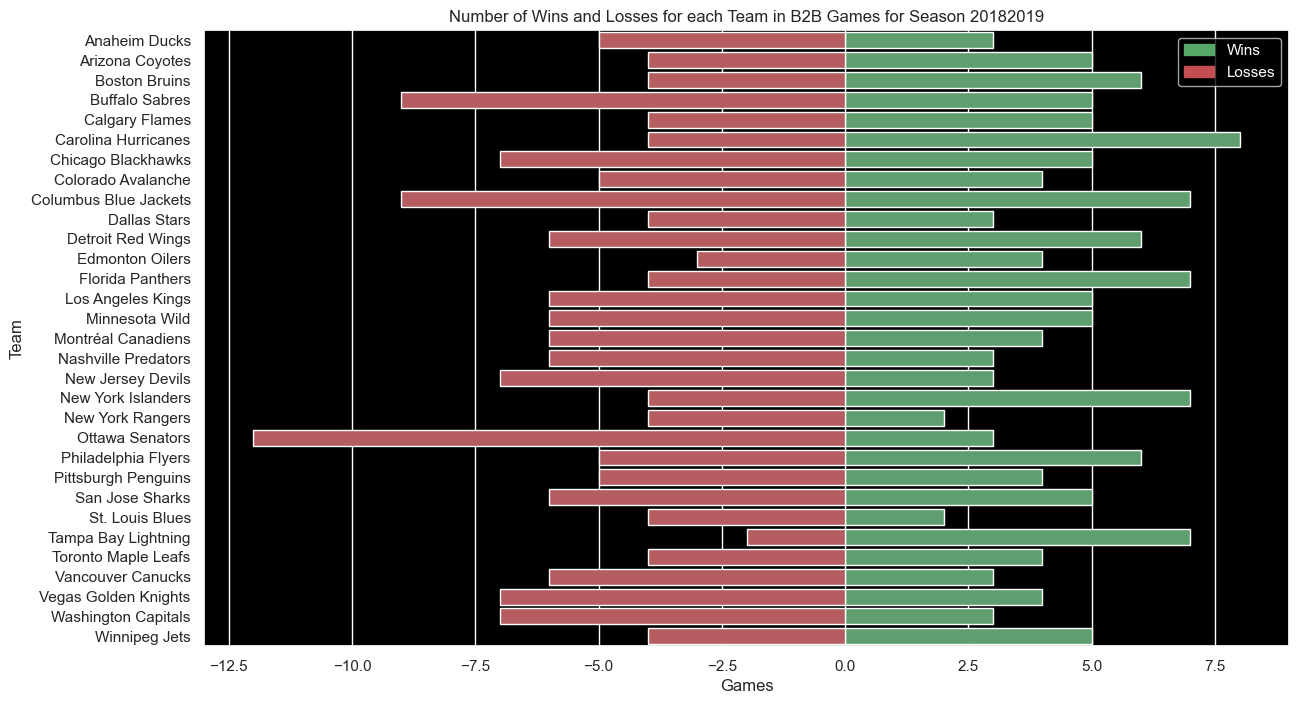

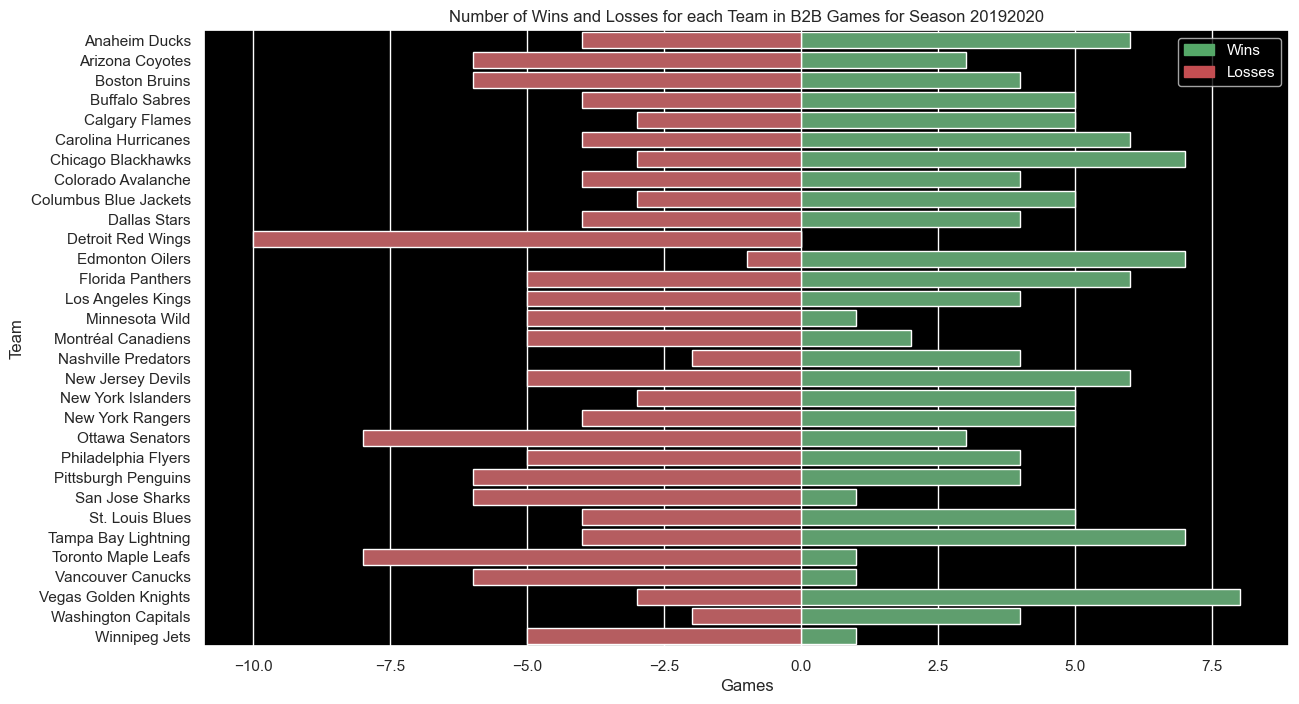

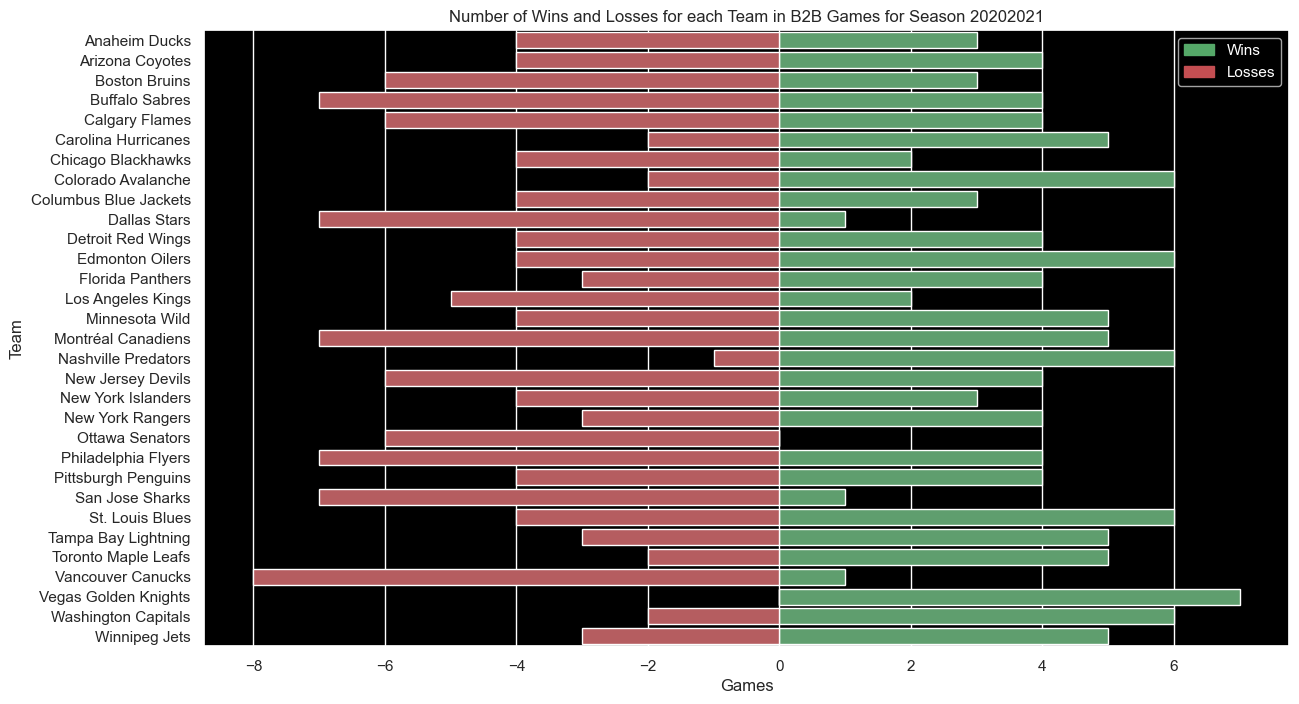

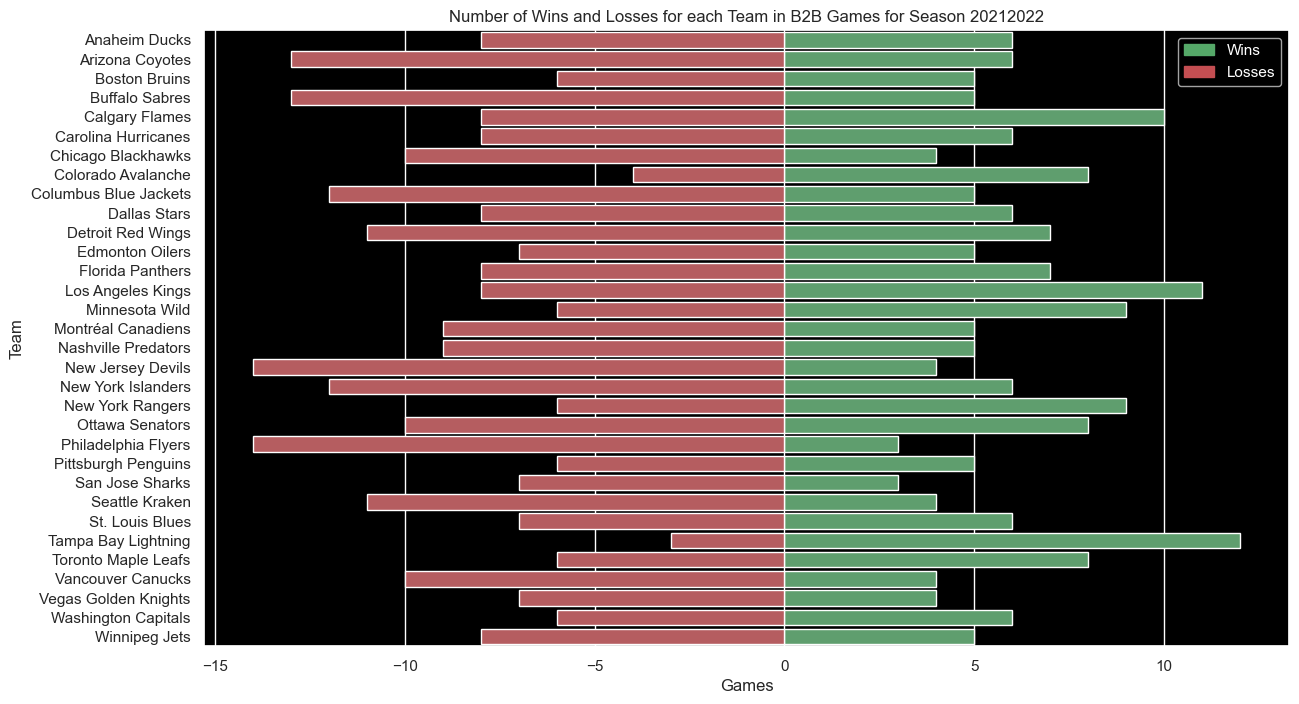

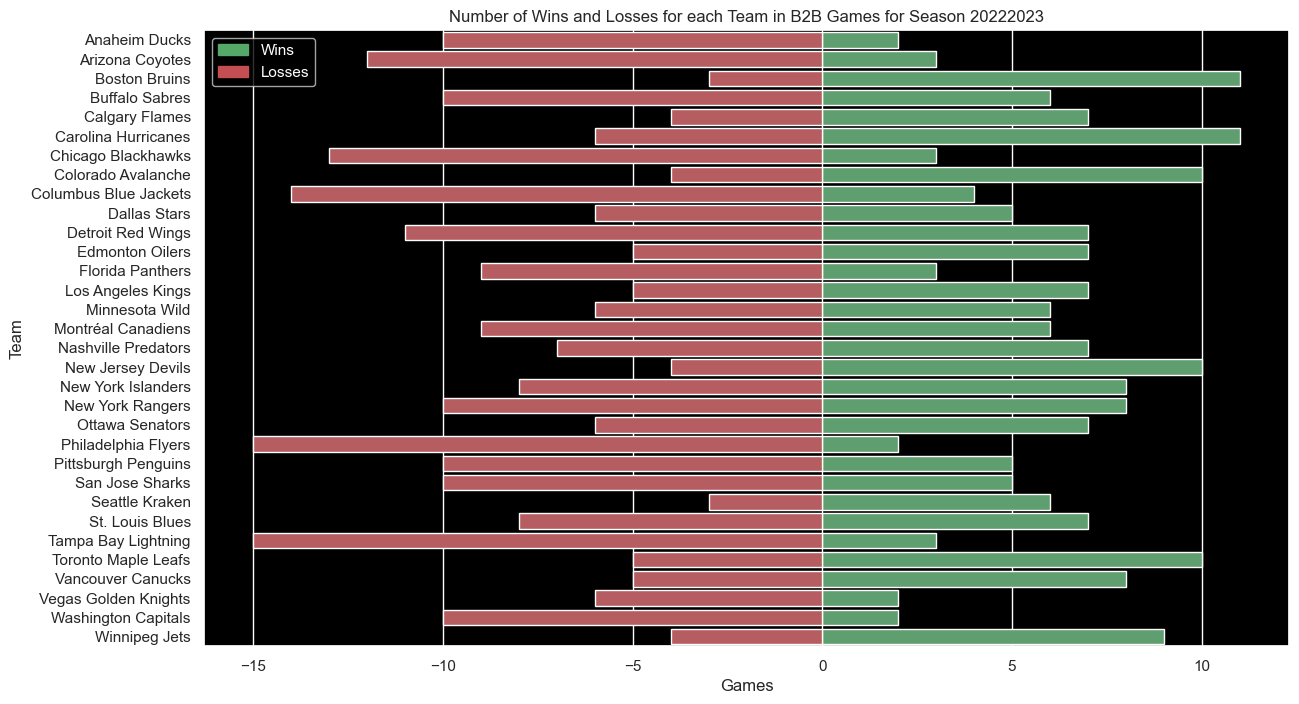

In [16]:
#Unique seasons
seasons = df_new['season'].unique()

#Plotting a win/loss graph for each season
for season in seasons:
    #win-loss counts
    team_results = df_new[df_new['season'] == season].groupby(['Team', 'Game Status']).size().unstack(fill_value = 0).reset_index()
    team_results.columns = ['Team', 'Losses', 'Wins']

    sns.set(rc = {'figure.figsize':(14, 8)})
    sns.set(rc = {'axes.facecolor':'black'})

    #Plotting wins on the right (positive values)
    wins_plot = sns.barplot(x = 'Wins', y = 'Team', 
                            data = team_results, 
                            orient = 'h',
                            color = 'g')

    #Plotting losses on the left (negative values)
    losses_plot = sns.barplot(x = -team_results['Losses'], y ='Team', 
                              data = team_results, 
                              orient = 'h',
                              color = 'r')

    wins_plot.set(xlabel = "Games", 
         ylabel = "Team", 
         title = f"Number of Wins and Losses for each Team in B2B Games for Season {season}")

    #Fixing the legend error
    legend_elements = [Patch(facecolor = 'g', edgecolor = 'g', label = 'Wins'),
                       Patch(facecolor = 'r', edgecolor = 'r', label = 'Losses')]

    legend = wins_plot.legend(handles = legend_elements)
    plt.setp(legend.get_texts(), color = 'white')

    plt.show()


/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


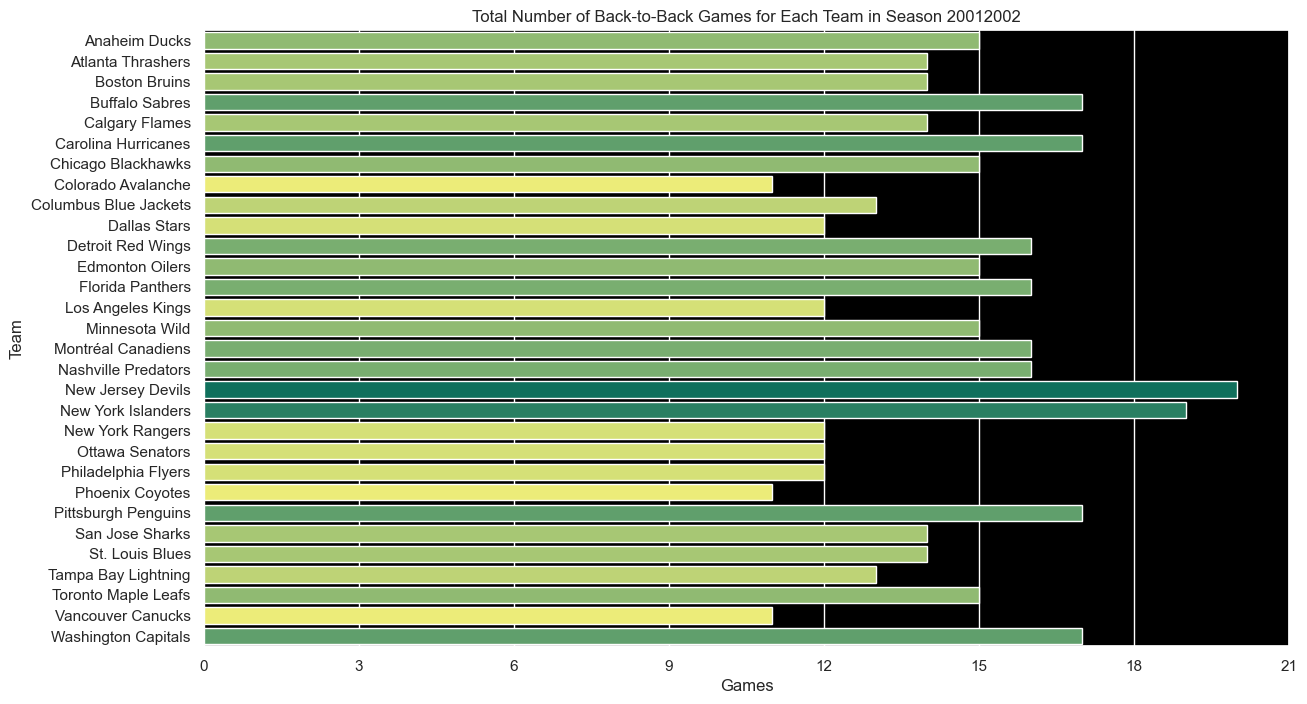

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


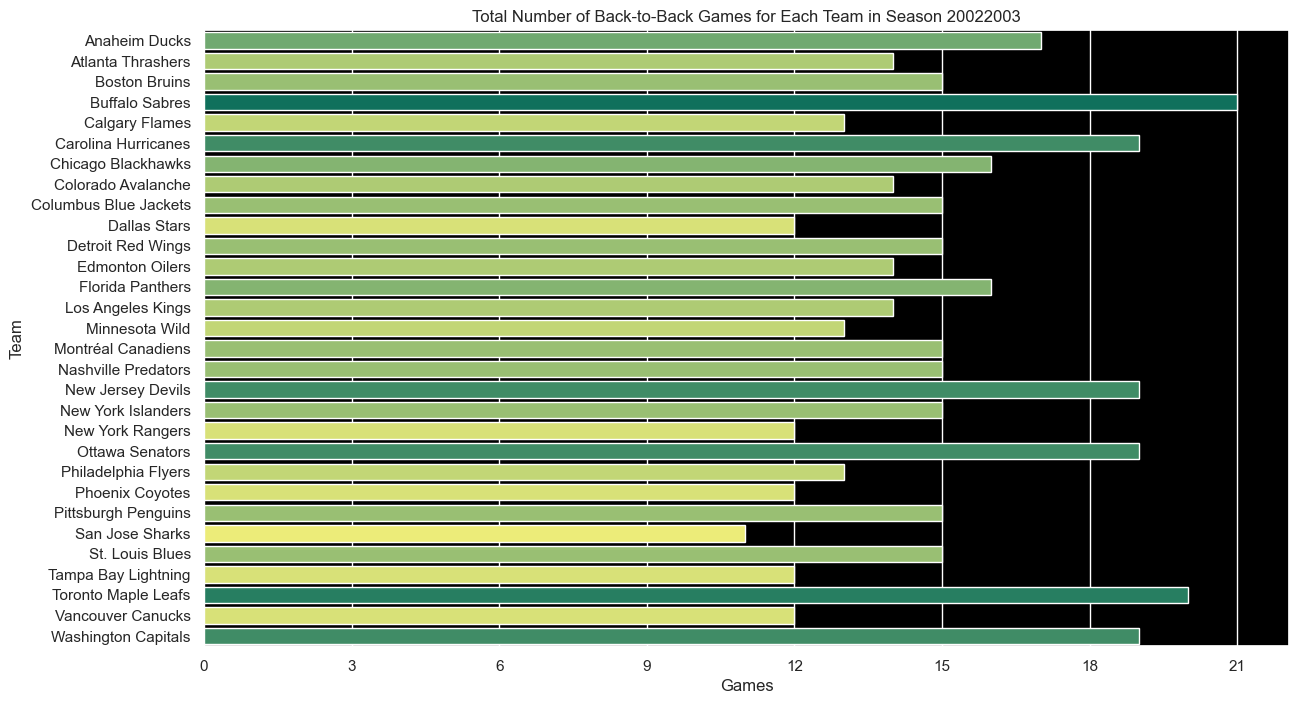

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


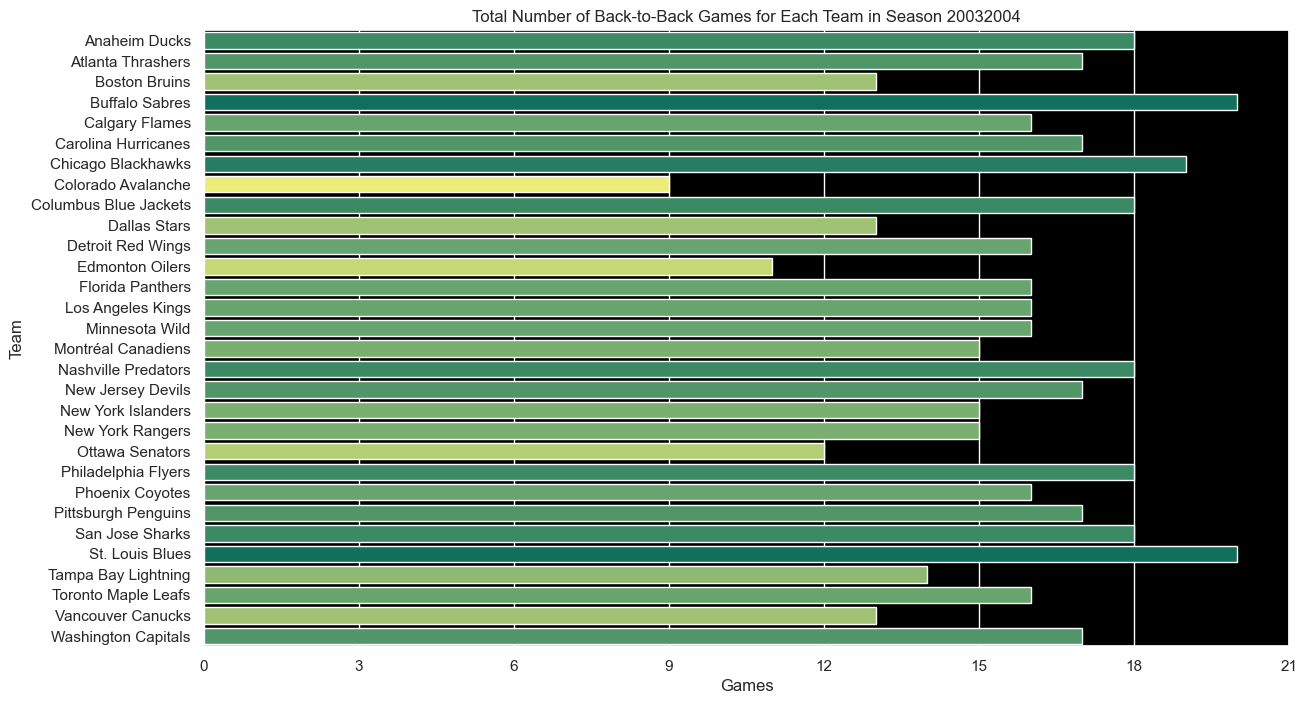

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


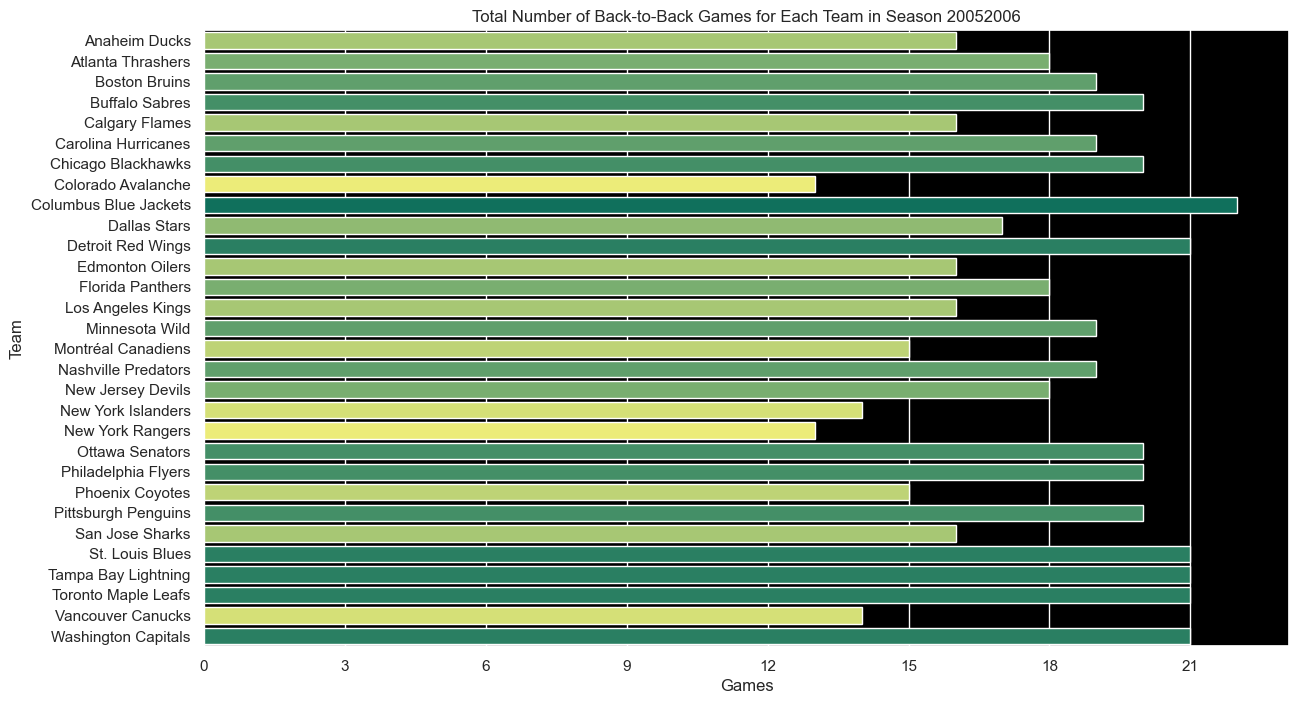

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


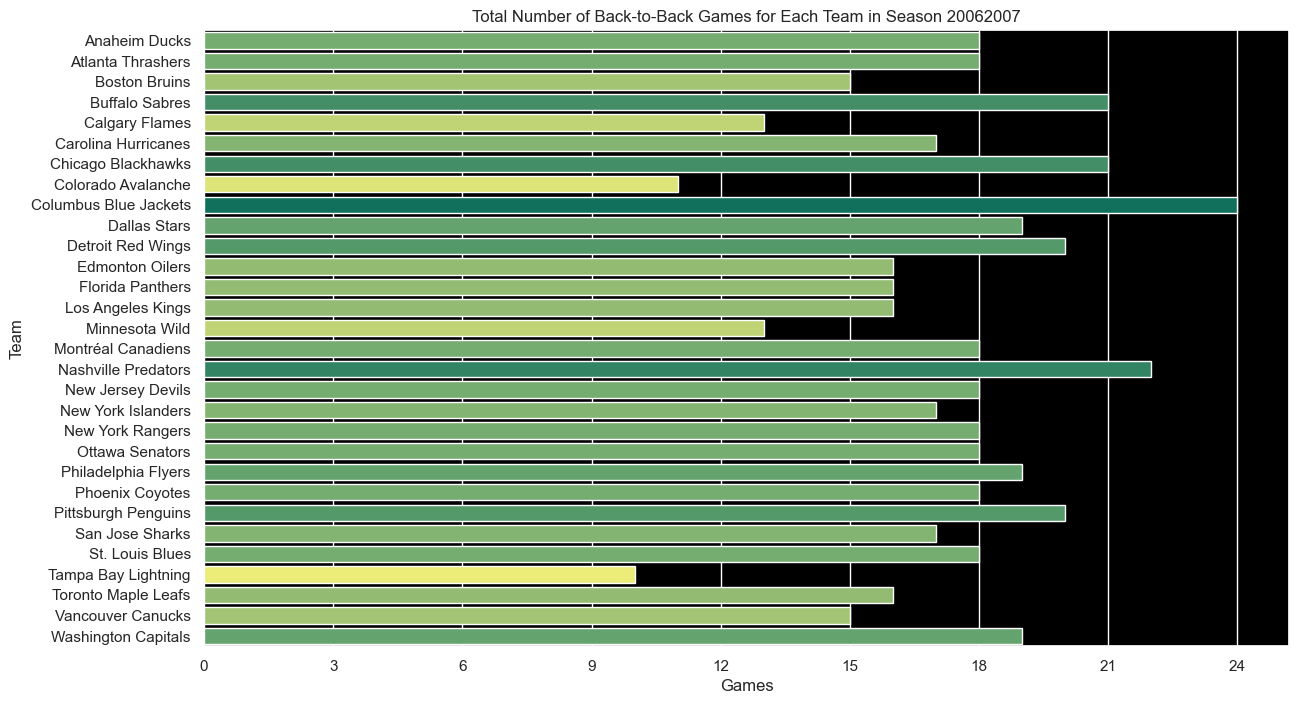

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


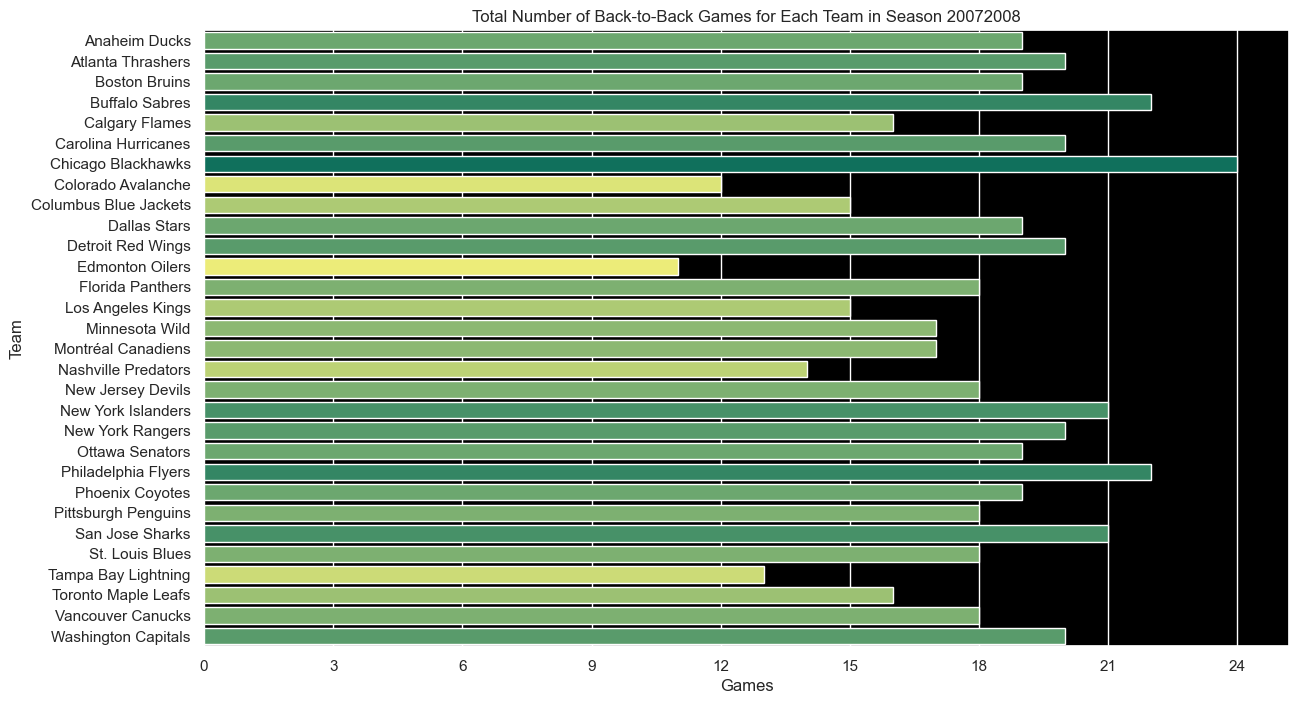

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


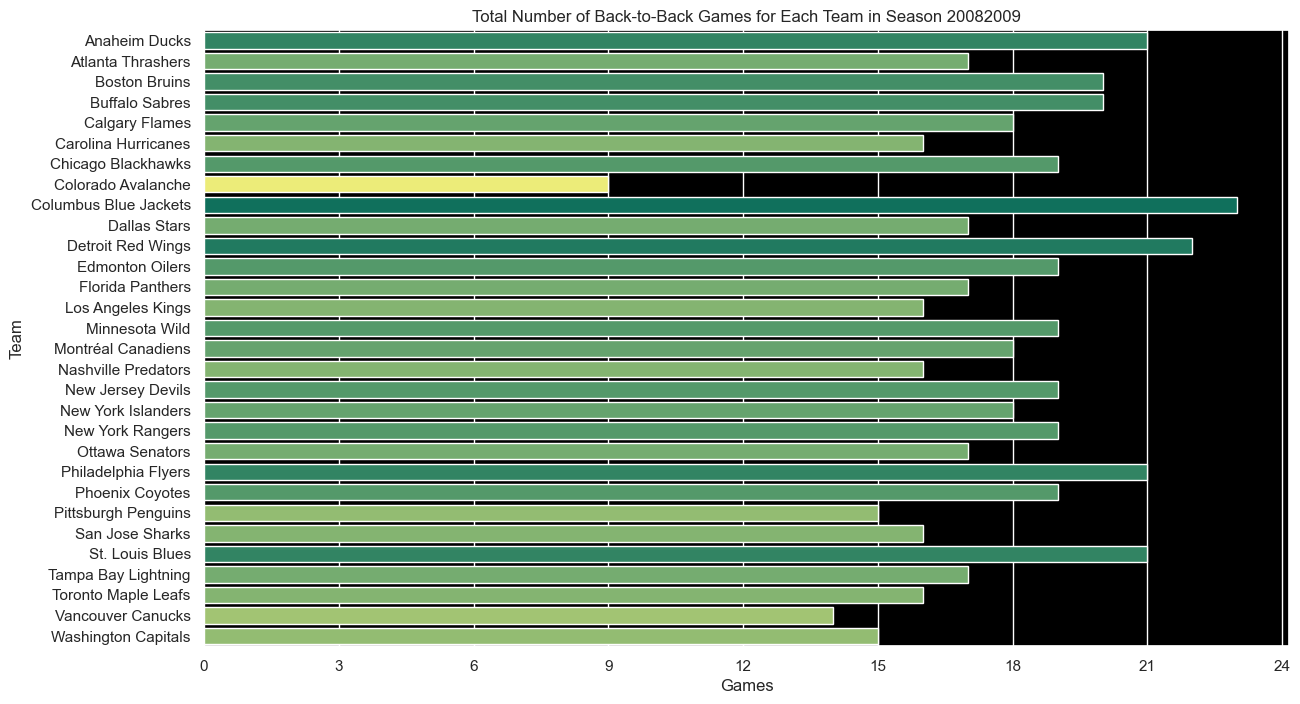

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


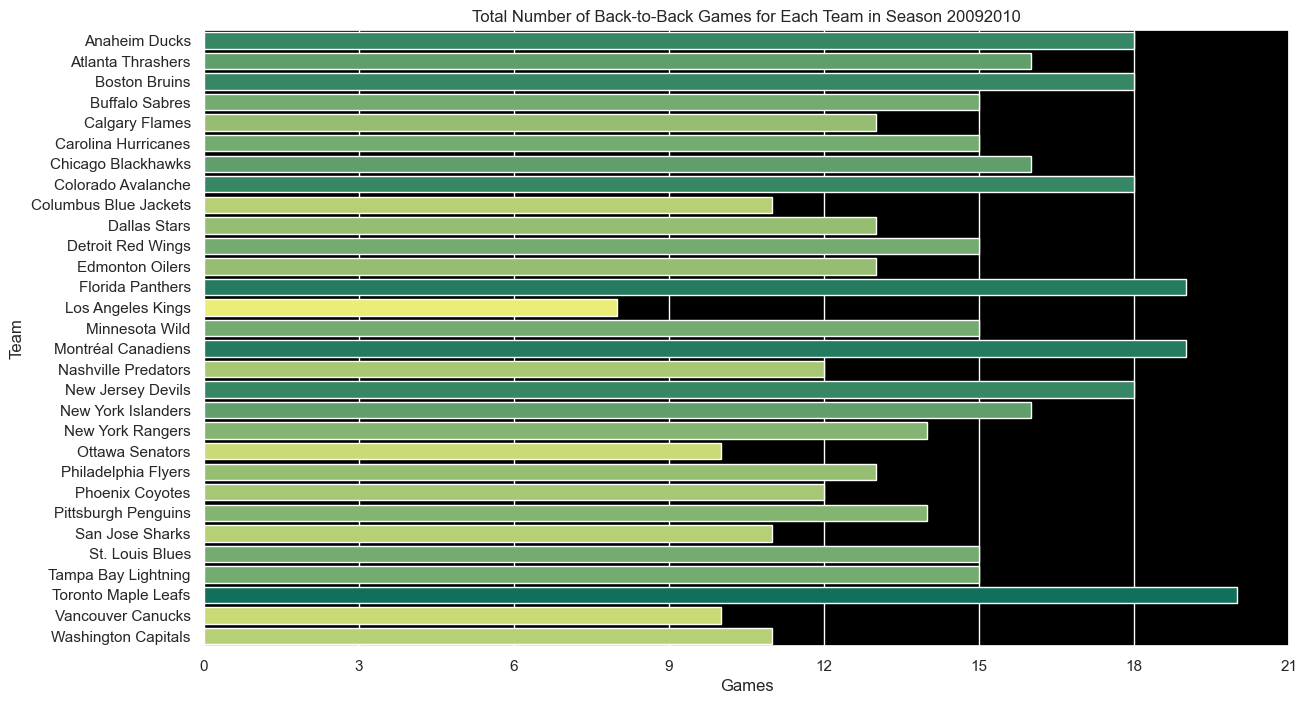

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


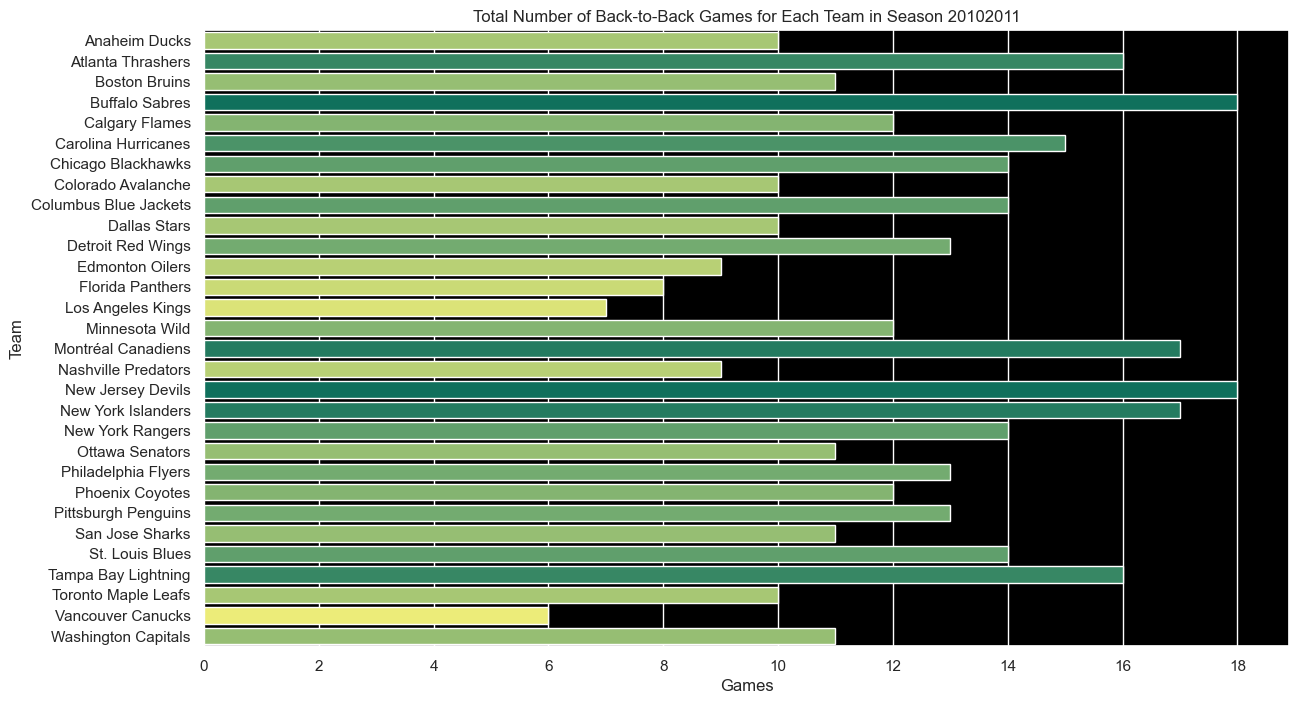

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


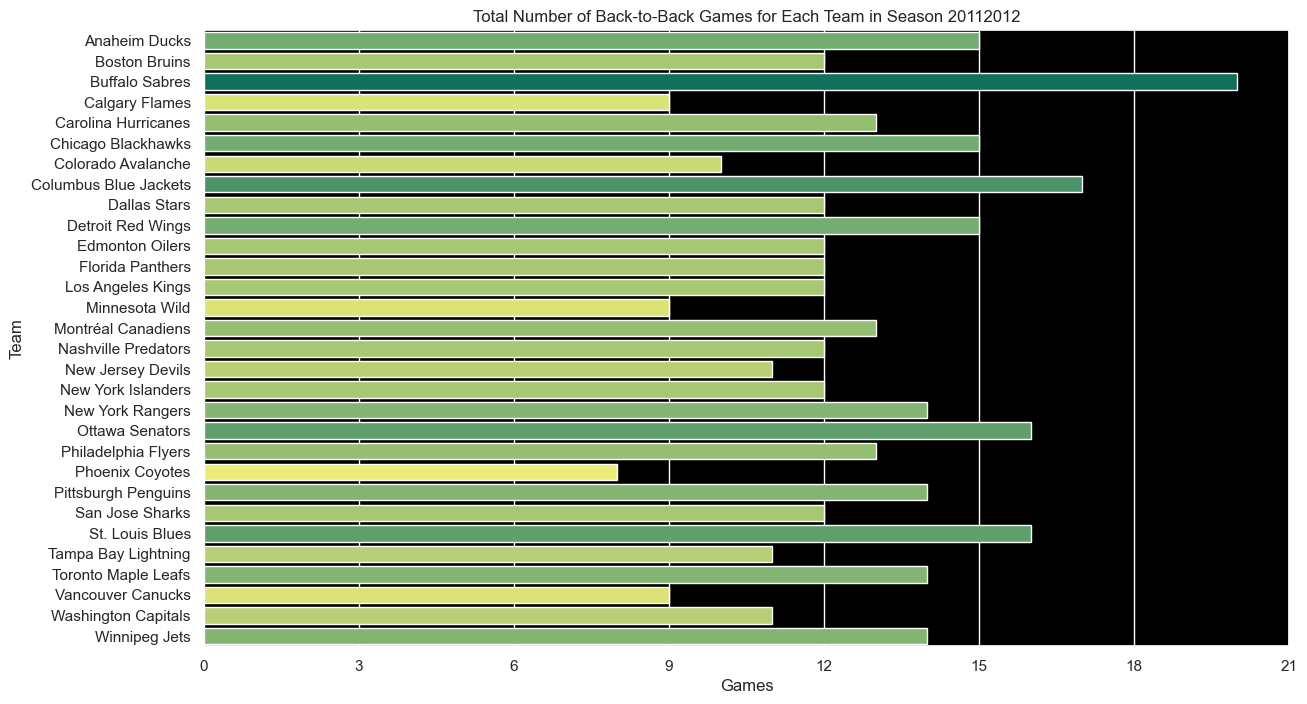

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


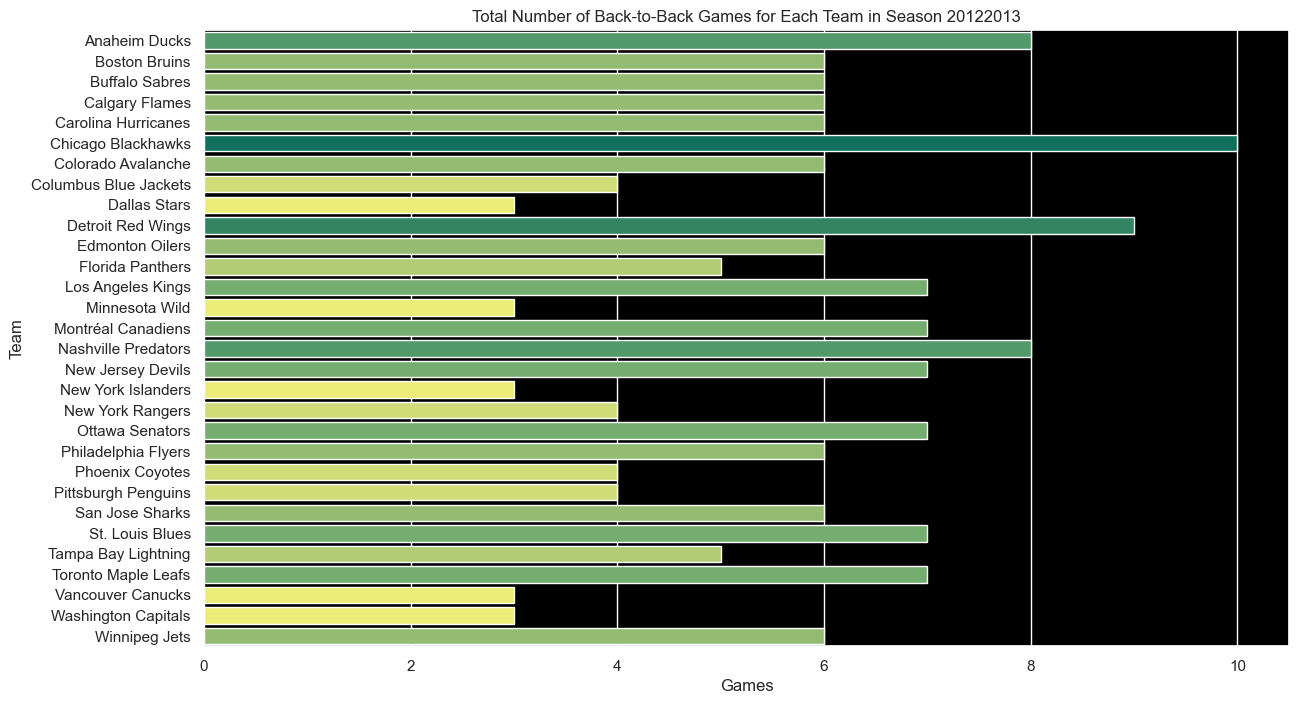

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


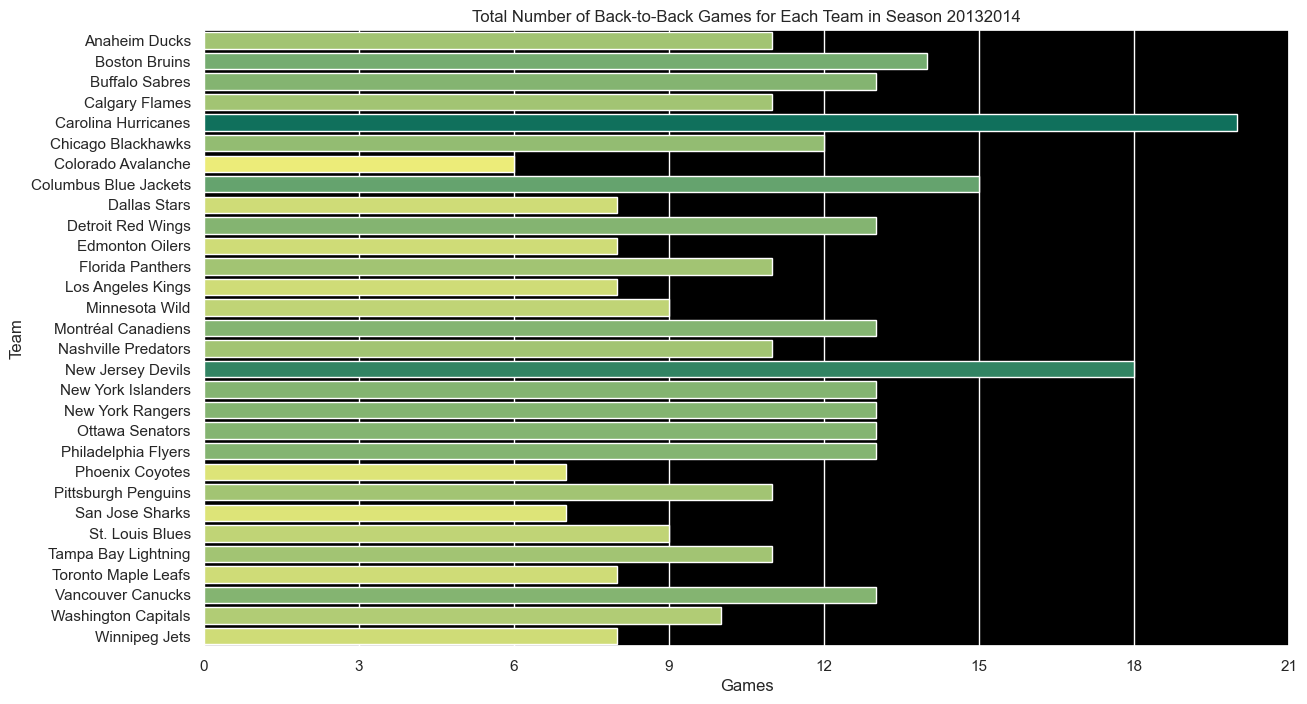

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


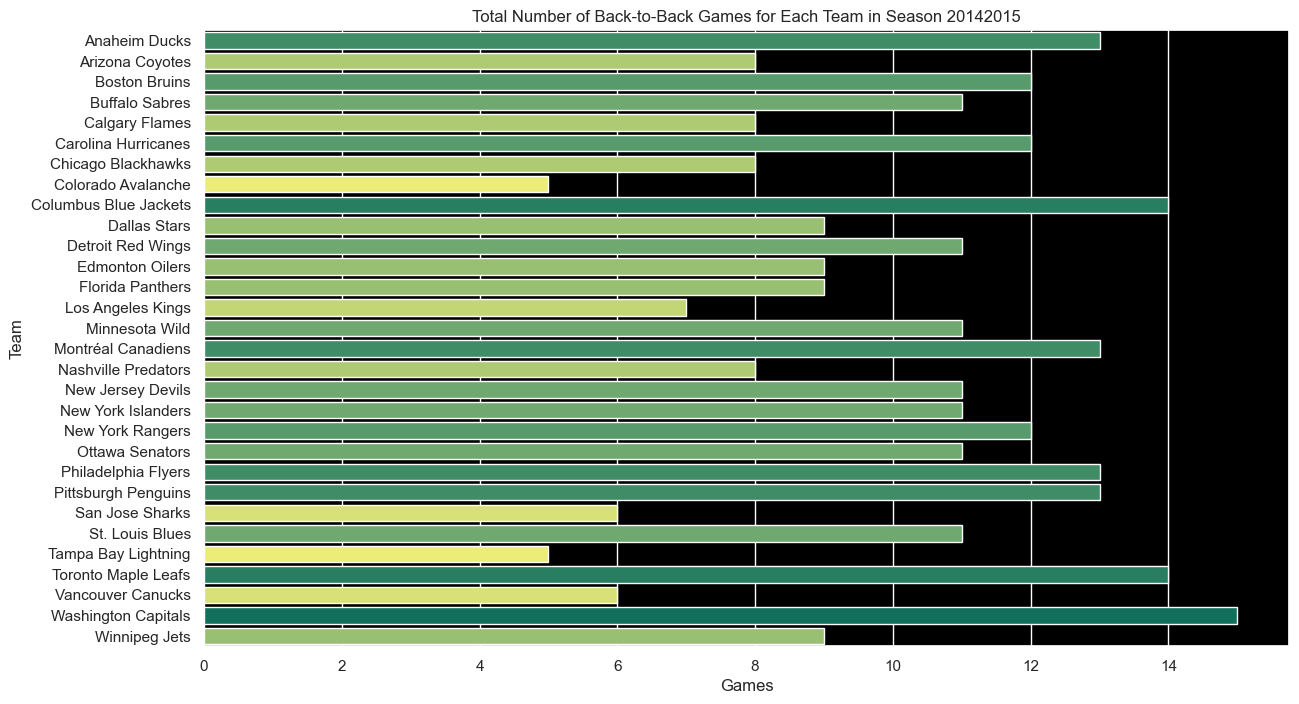

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


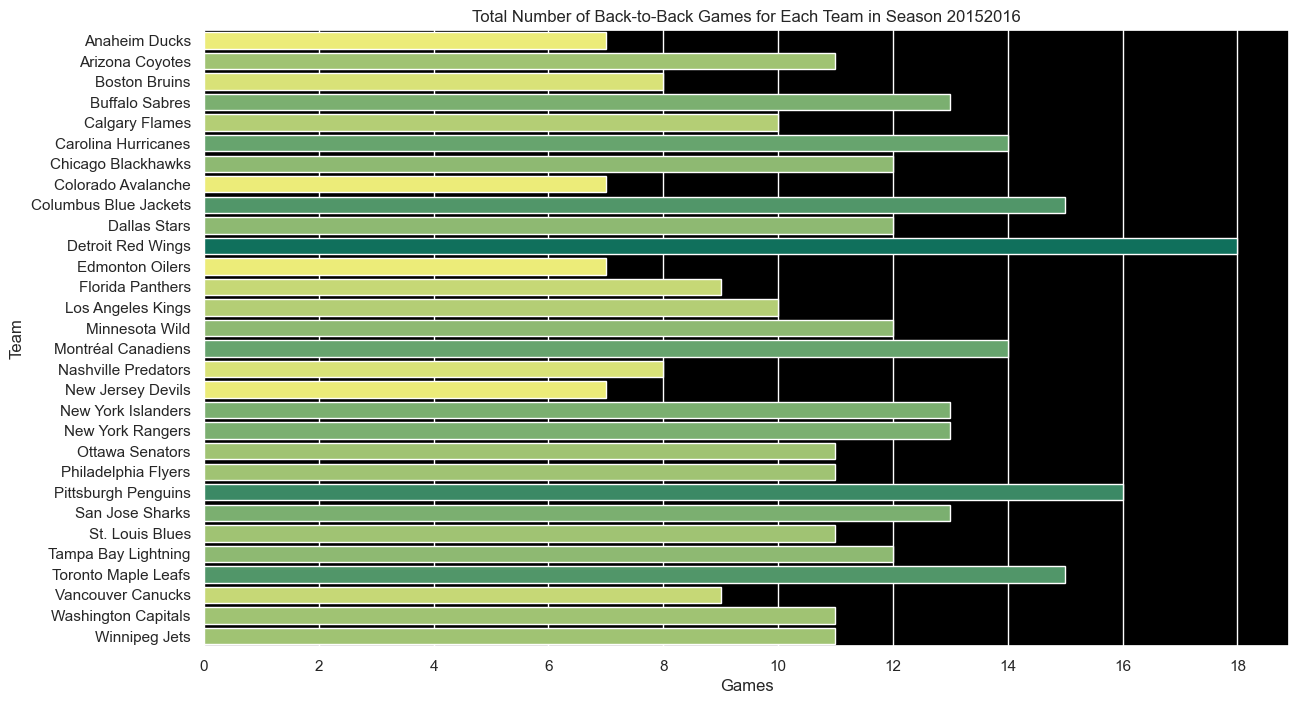

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


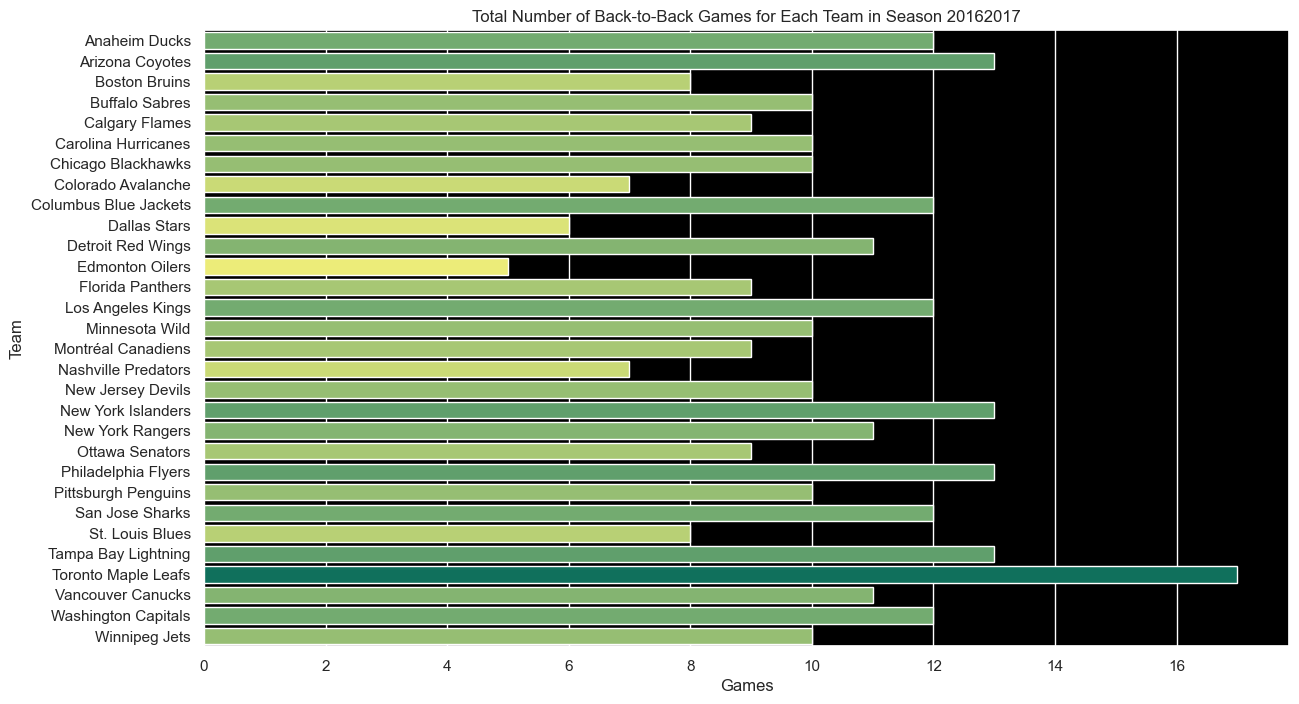

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


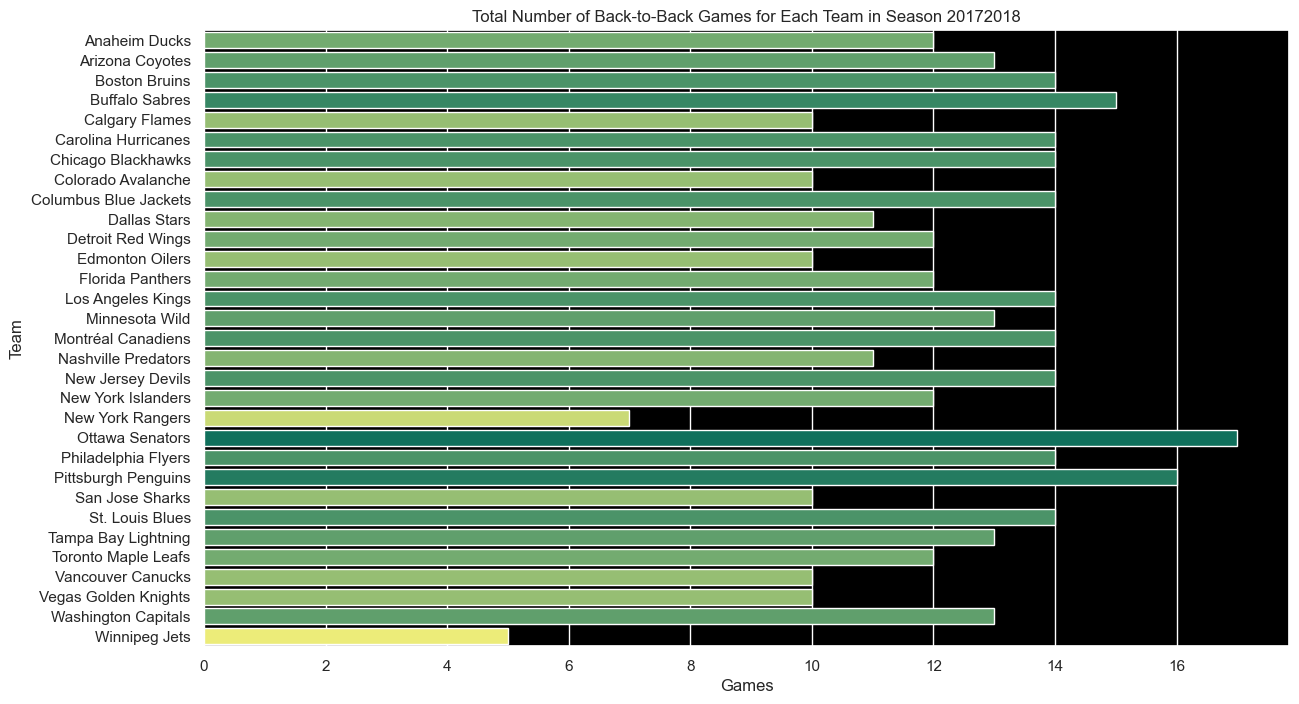

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


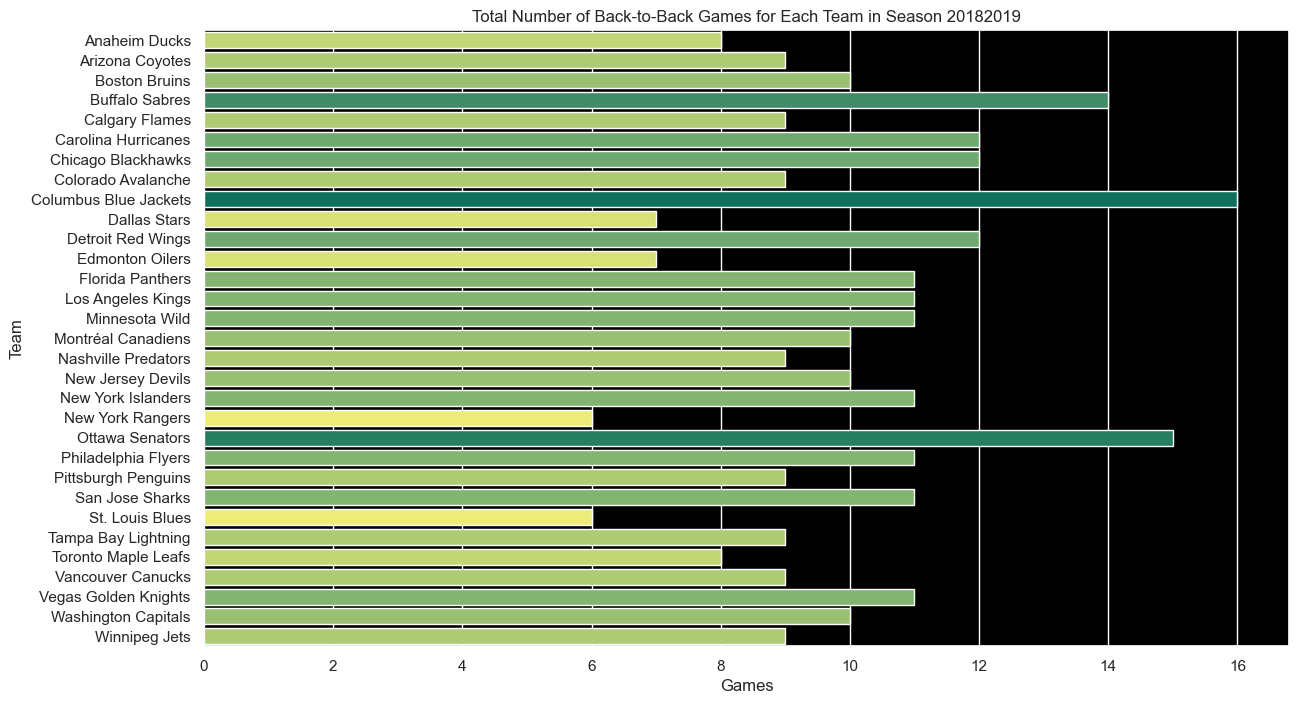

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


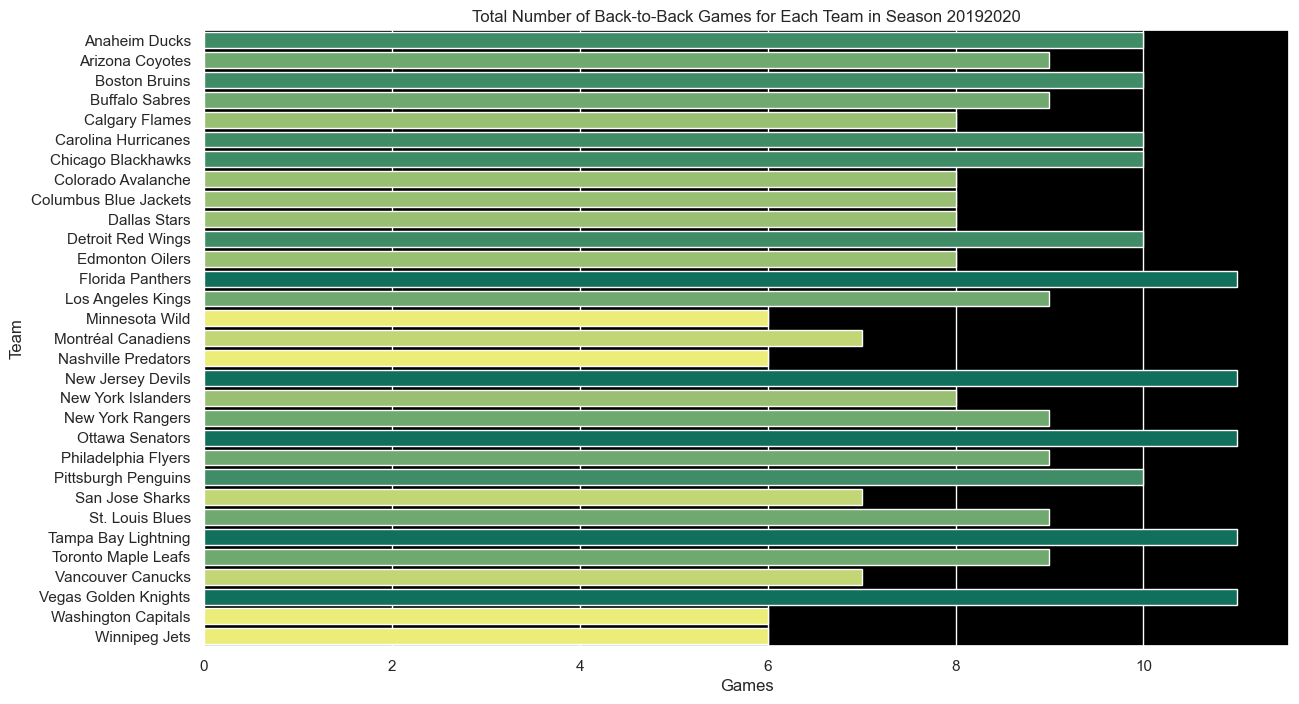

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


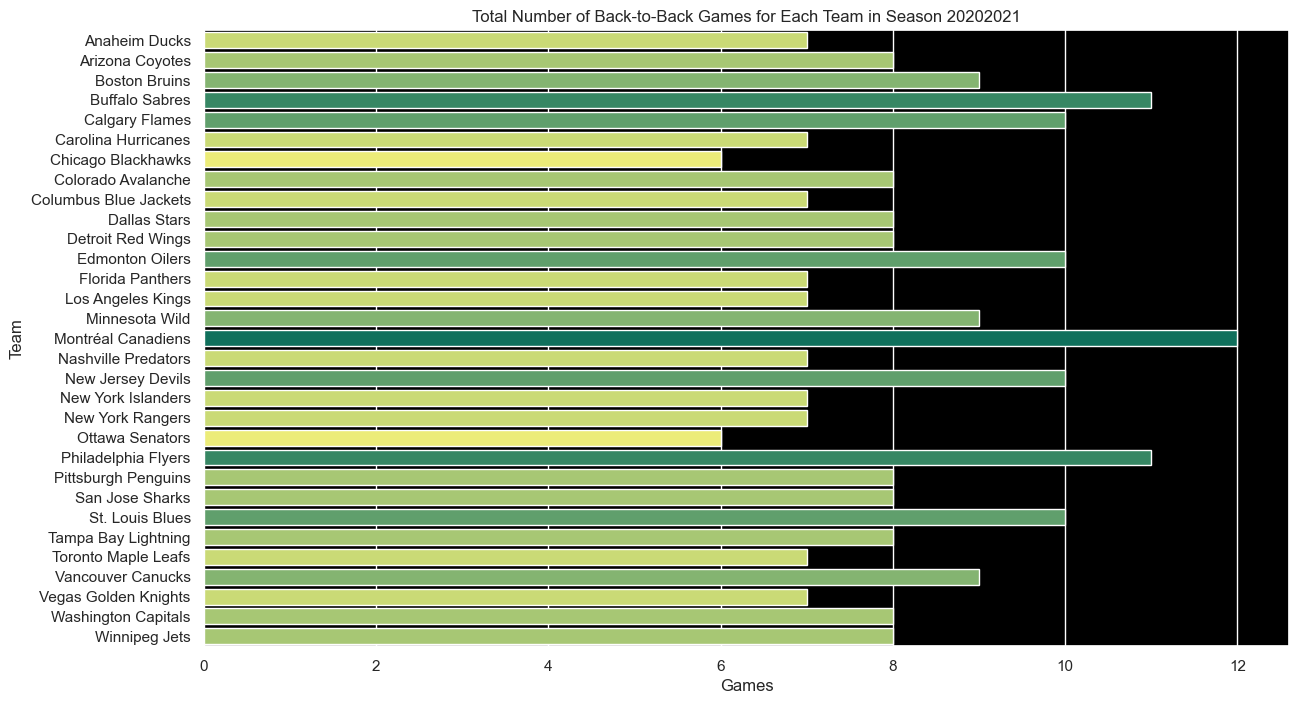

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


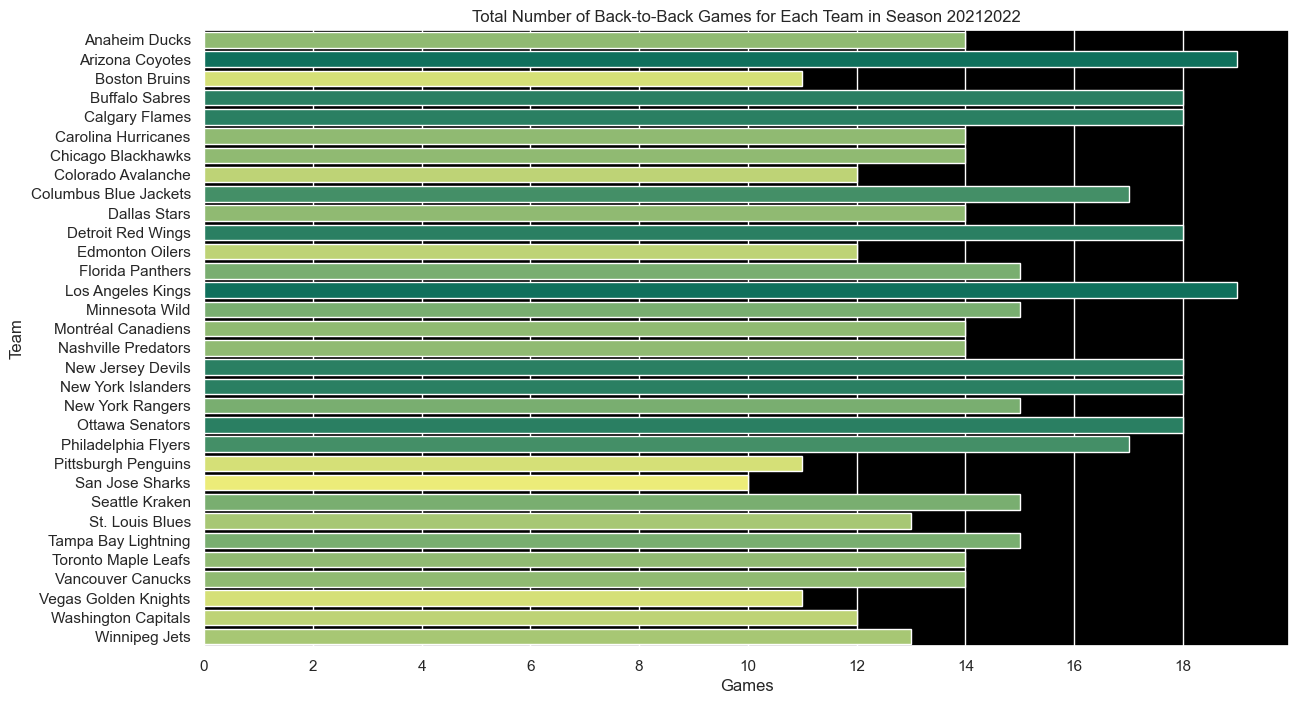

/var/folders/m3/_gc07yxj4zj_6mg5xxsmzkx00000gn/T/ipykernel_16470/2084505840.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("summer_r")


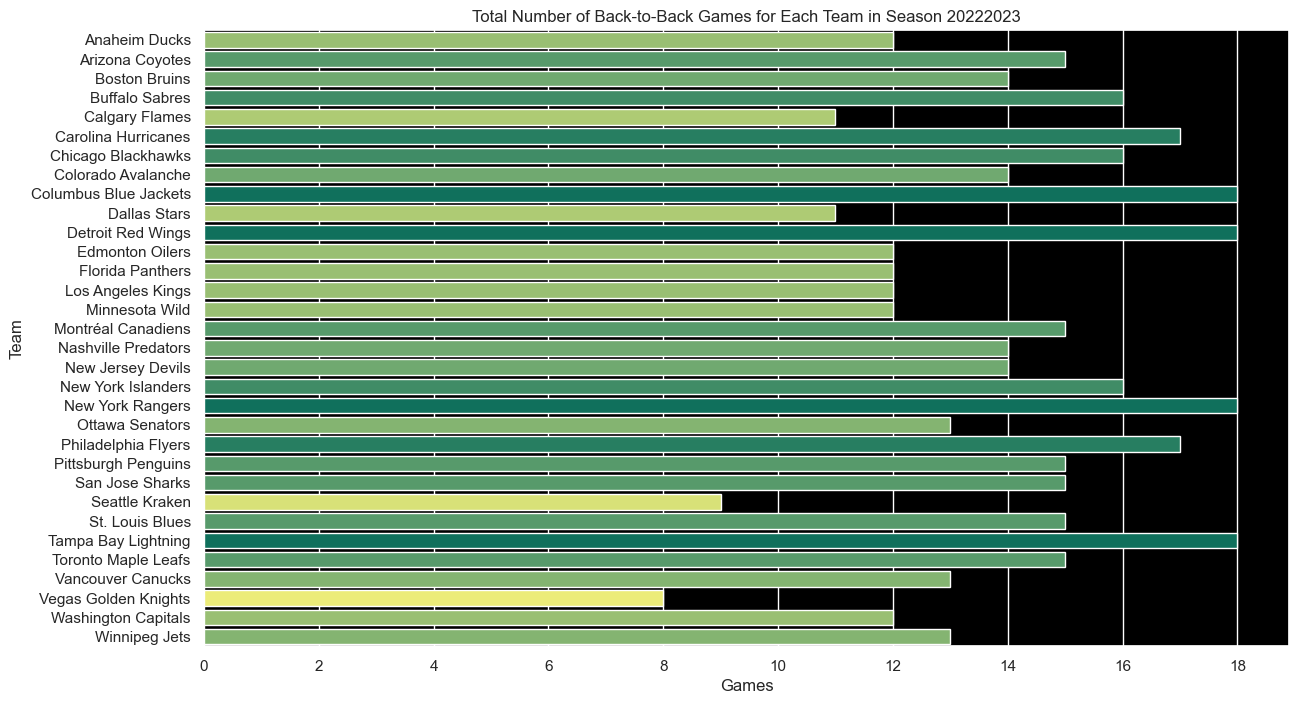

In [17]:
#Plotting graph for total number of games
for season in seasons:
    team_results = df_new[df_new['season'] == season].groupby('Team').size().reset_index(name = 'B2B Games')   
    norm = Normalize(team_results['B2B Games'].min(), team_results['B2B Games'].max())
    cmap = get_cmap("summer_r")
    team_results['color'] = team_results['B2B Games'].apply(lambda x: cmap(norm(x)))

    sns.set(rc={'figure.figsize':(14, 8)})
    sns.set(rc={'axes.facecolor':'black'})
    #st = axes_style("whitegrid")

    #Plotting for total b2b games count
    b2b_plot = sns.barplot(x = 'B2B Games', y = 'Team', 
                           data = team_results, 
                           orient = 'h', 
                           palette = team_results['color'])

    b2b_plot.set(xlabel = "Games", 
                 ylabel = "Team", 
                 title = f"Total Number of Back-to-Back Games for Each Team in Season {season}")
    
    b2b_plot.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.show()

In [18]:
df1 = pd.read_csv("player_performance_final.csv")
df2 = pd.read_csv("game_data.csv", header=1)

In [19]:
#df2.columns = df2.columns.get_level_values(1)
pd.set_option('display.max_columns', None)

In [20]:
#Defining column names for game data
df2 = df2.rename(columns = {
    'Unnamed: 0': 'game_id', 
    'GP': 'game_played', 
    'Date': 'date', 
    'Unnamed: 2_level_1': 'home_away', 
    'Opponent': 'opponent', 
    'GF': 'team_GF', 
    'GA': 'team_GA', 
    'Unnamed: 6_level_1': 'win_loss',
    'Unnamed: 7_level_1': 'extra_time', 
    'Unnamed: 8_level_1': 'extra_info', 
    'S': 'team_shots', 
    'PIM': 'team_PIM', 
    'PPG': 'team_PPG', 
    'PPO': 'team_PPO', 
    'SHG': 'team_SHG', 
    'Unnamed: 14_level_1': 'extra_info_1', 
    'S.1': 'opp_shots', 
    'PIM.1': 'opp_PIM', 
    'PPG.1': 'opp_PPG', 
    'PPO.1': 'opp_PPO', 
    'SHG.1': 'opp_SHG', 
    'Unnamed: 20_level_1': 'extra_info_2', 
    'CF': 'team_CF', 
    'CA': 'team_CA', 
    'CF%': 'team_CF_percentage', 
    'FF': 'team_FF', 
    'FA': 'team_FA', 
    'FF%': 'team_FF_percentage', 
    'FOW': 'team_FOW', 
    'FOL': 'team_FOL', 
    'FO%': 'team_FO_win_percentage', 
    'oZS%': 'team_oZS_percentage', 
    'PDO': 'team_PDO', 
    'Unnamed: 33': 'Team', 
    'Unnamed: 34': 'season'
})


In [21]:
#Cleaning the player performance data
df1 = df1[df1['Player'] != 'TOTAL']
df1.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace = True)
df1['date'] = pd.to_datetime(df1['date'])
df1['season'] = df1['date'].dt.year.where(df1['date'].dt.month > 6, df1['date'].dt.year - 1)
df1['season'] = df1['season'].astype(str) + (df1['season'] + 1).astype(str)
df1['TOI'] = df1['TOI'].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)

In [22]:
#Cleaning the game data
df2['season'] = df2['season'].apply(lambda x: str(int(x) - 1) + str(x))
df2 = df2[df2['game_played'] != 'GP']
df2['home_away'] = np.where(df2['home_away'] == '@', 'away', 'home')

In [23]:
team_names = {
    'VEG': 'Vegas Golden Knights',
    'LAK': 'Los Angeles Kings',
    'TBL': 'Tampa Bay Lightning',
    'NYR': 'New York Rangers',
    'SEA': 'Seattle Kraken',
    'ANA': 'Anaheim Ducks',
    'SJS': 'San Jose Sharks',
    'CBJ': 'Columbus Blue Jackets',
    'CAR': 'Carolina Hurricanes',
    'CHI': 'Chicago Blackhawks',
    'COL': 'Colorado Avalanche',
    'VAN': 'Vancouver Canucks',
    'EDM': 'Edmonton Oilers',
    'TOR': 'Toronto Maple Leafs',
    'MTL': 'Montreal Canadiens',
    'BOS': 'Boston Bruins',
    'WSH': 'Washington Capitals',
    'OTT': 'Ottawa Senators',
    'BUF': 'Buffalo Sabres',
    'CGY': 'Calgary Flames',
    'MIN': 'Minnesota Wild',
    'FLA': 'Florida Panthers',
    'NYI': 'New York Islanders',
    'DAL': 'Dallas Stars',
    'NSH': 'Nashville Predators',
    'DET': 'Detroit Red Wings',
    'ARI': 'Arizona Coyotes',
    'PIT': 'Pittsburgh Penguins',
    'NJD': 'New Jersey Devils',
    'PHI': 'Philadelphia Flyers',
    'STL': 'St. Louis Blues',
    'WPG': 'Winnipeg Jets',
    'ATL': 'Atlanta Thrashers',  # Adding Atlanta Thrashers (now Winnipeg Jets)
    'PHX': 'Phoenix Coyotes',    # Adding Phoenix Coyotes (now Arizona Coyotes)
}

#Mapping team names to game data based on abbrivation
df2['Team'] = df2['Team'].map(team_names)

In [24]:
df['date'] = pd.to_datetime(df['date'])

#df1:player_performance
dc1 = pd.to_datetime(df1['date'], format = '%Y-%m-%d', errors = 'coerce')
dc2 = pd.to_datetime(df1['date'], format = '%d/%m/%y', errors = 'coerce')
df1['date'] = dc1.fillna(dc2)

#df2:team_performance
dc3 = pd.to_datetime(df2['date'], format = '%Y-%m-%d', errors = 'coerce')
dc4 = pd.to_datetime(df2['date'], format = '%d/%m/%y', errors = 'coerce')
df2['date'] = dc3.fillna(dc4)

In [25]:
#Adding b2b_game status column in both player data and game data 
b2b_home_games = df[df['home_back_to_back'] == 1][['date', 'homename']]
b2b_away_games = df[df['away_back_to_back'] == 1][['date', 'awayname']]
b2b_home_games.columns = ['date', 'team']
b2b_away_games.columns = ['date', 'team']

b2b_final = pd.concat([b2b_home_games, b2b_away_games])
b2b_final_list = list(b2b_final.itertuples(index = False, name = None))

In [26]:
df1['is_b2b_game'] = df1.apply(lambda x: (x['date'], x['team']) in b2b_final_list, axis=1).astype(int)
df2['is_b2b_game'] = df2.apply(lambda x: (x['date'], x['Team']) in b2b_final_list, axis=1).astype(int)   

In [27]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'link'], axis = 1, inplace = True)

In [28]:
print(df.isnull().sum())

ID                   0
type                 0
season               0
date                 0
homeid               0
homename             0
homescore            0
awayid               0
awayname             0
awayscore            0
state                0
venue                0
home_back_to_back    0
away_back_to_back    0
is_b2b_game          0
winner               0
dtype: int64


In [29]:
print(df1.isnull().sum())

Rk                  0
Player              0
G                   0
A                   0
PTS                 0
+/-                 0
PIM                 0
EV                  0
EV.1           146672
PP                  0
PP.1           146672
SH                  0
SH.1           146672
GW                  0
EV.2           146672
EV.3           146672
PP.2           146672
PP.3           146672
SH.2           146672
SH.3           146672
S                   0
S%             129011
SHFT                0
TOI                 0
iCF                 0
SAT‑F               0
SAT‑A               0
CF%                 0
CRel%               0
ZSO               132
ZSD               132
oZS%             2076
HIT                 0
BLK              1046
team                0
date                0
season              0
is_b2b_game         0
dtype: int64


In [30]:
print(df2.isnull().sum())

game_id                       0
game_played                   0
date                          0
home_away                     0
opponent                      0
team_GF                       0
team_GA                       0
win_loss                      0
extra_time                26516
extra_info                34603
team_shots                    0
team_PIM                      0
team_PPG                      0
team_PPO                  13200
team_SHG                      0
extra_info_1              34603
opp_shots                     0
opp_PIM                       0
opp_PPG                       0
opp_PPO                   13200
opp_SHG                       0
extra_info_2              34603
team_CF                      18
team_CA                      18
team_CF_percentage           18
team_FF                      18
team_FA                       0
team_FF_percentage           18
team_FOW                      0
team_FOL                      0
team_FO_win_percentage       18
team_oZS

# There are no significant missing values for the relevant metrics in both datasets

In [32]:
print(df.head(10))
print(df.tail(10))
print(df.sample(10))

           ID type    season       date  homeid               homename  \
0  2001020001    R  20012002 2001-10-03      10    Toronto Maple Leafs   
1  2001020002    R  20012002 2001-10-03       5    Pittsburgh Penguins   
2  2001020003    R  20012002 2001-10-03      20         Calgary Flames   
3  2001020005    R  20012002 2001-10-04       7         Buffalo Sabres   
4  2001020006    R  20012002 2001-10-04       9        Ottawa Senators   
5  2001020007    R  20012002 2001-10-04       4    Philadelphia Flyers   
6  2001020008    R  20012002 2001-10-04      29  Columbus Blue Jackets   
7  2001020004    R  20012002 2001-10-04       6          Boston Bruins   
8  2001020009    R  20012002 2001-10-04      23      Vancouver Canucks   
9  2001020011    R  20012002 2001-10-04      28        San Jose Sharks   

   homescore  awayid            awayname  awayscore  state  \
0          4       9     Ottawa Senators          5  Final   
1          1      21  Colorado Avalanche          3  Final   

In [31]:
print(df1.head(10))
print(df1.tail(10))
print(df1.sample(10))

     Rk            Player    G    A  PTS  +/-  PIM   EV  EV.1   PP  PP.1   SH  \
0   1.0      Matt Benning  0.0  0.0    0 -2.0    2  0.0   0.0  0.0   0.0  0.0   
1   2.0       Nick Bonino  0.0  0.0    0 -1.0    0  0.0   0.0  0.0   0.0  0.0   
2   3.0     Logan Couture  0.0  0.0    0 -2.0    0  0.0   0.0  0.0   0.0  0.0   
3   4.0     Mario Ferraro  0.0  0.0    0 -1.0    0  0.0   0.0  0.0   0.0  0.0   
4   5.0   Jonah Gadjovich  0.0  0.0    0  0.0    7  0.0   0.0  0.0   0.0  0.0   
5   6.0       Noah Gregor  0.0  0.0    0 -1.0    0  0.0   0.0  0.0   0.0  0.0   
6   7.0  Scott Harrington  0.0  0.0    0  0.0    0  0.0   0.0  0.0   0.0  0.0   
7   8.0       Tomáš Hertl  1.0  0.0    1  0.0    0  1.0   0.0  0.0   0.0  0.0   
8   9.0     Erik Karlsson  0.0  0.0    0  0.0    0  0.0   0.0  0.0   0.0  0.0   
9  10.0        Luke Kunin  0.0  1.0    1  0.0    2  0.0   1.0  0.0   0.0  0.0   

   SH.1   GW  EV.2  EV.3  PP.2  PP.3  SH.2  SH.3    S    S%  SHFT        TOI  \
0   0.0  0.0   0.0   0.0   0

In [33]:
print(df2.head(10))
print(df2.tail(10))
print(df2.sample(10))

   game_id game_played       date home_away               opponent team_GF  \
0        0           1 2009-10-03      home        San Jose Sharks       1   
1        1           2 2009-10-06      away         Minnesota Wild       3   
2        2           3 2009-10-08      away          Boston Bruins       6   
3        3           4 2009-10-10      away    Philadelphia Flyers       3   
4        4           5 2009-10-11      away       New York Rangers       0   
5        5           6 2009-10-14      home         Minnesota Wild       3   
6        6           7 2009-10-17      home        St. Louis Blues       0   
7        7           8 2009-10-21      home           Dallas Stars       2   
8        8           9 2009-10-24      home  Columbus Blue Jackets       4   
9        9          10 2009-10-26      home    Toronto Maple Leafs       3   

  team_GA win_loss extra_time  extra_info team_shots team_PIM team_PPG  \
0       4        L        NaN         NaN         25       34      

In [44]:
print(df1.columns)
print(df2.columns)
print(df.columns)

Index(['Rk', 'Player', 'G', 'A', 'PTS', '+/-', 'PIM', 'EV', 'EV.1', 'PP',
       'PP.1', 'SH', 'SH.1', 'GW', 'EV.2', 'EV.3', 'PP.2', 'PP.3', 'SH.2',
       'SH.3', 'S', 'S%', 'SHFT', 'TOI', 'iCF', 'SAT‑F', 'SAT‑A', 'CF%',
       'CRel%', 'ZSO', 'ZSD', 'oZS%', 'HIT', 'BLK', 'team', 'date', 'season',
       'is_b2b_game'],
      dtype='object')
Index(['game_id', 'game_played', 'date', 'home_away', 'opponent', 'team_GF',
       'team_GA', 'win_loss', 'extra_time', 'extra_info', 'team_shots',
       'team_PIM', 'team_PPG', 'team_PPO', 'team_SHG', 'extra_info_1',
       'opp_shots', 'opp_PIM', 'opp_PPG', 'opp_PPO', 'opp_SHG', 'extra_info_2',
       'team_CF', 'team_CA', 'team_CF_percentage', 'team_FF', 'team_FA',
       'team_FF_percentage', 'team_FOW', 'team_FOL', 'team_FO_win_percentage',
       'team_oZS_percentage', 'team_PDO', 'Team', 'season', 'is_b2b_game'],
      dtype='object')
Index(['ID', 'type', 'season', 'date', 'homeid', 'homename', 'homescore',
       'awayid', 'awayname', 'a

In [25]:
df.to_csv("schedule_data.csv")

In [26]:
df1.to_csv("player_performance_data.csv")

In [27]:
df2.to_csv("team_performance_data.csv")